# Modul 1 AI - Preprocessing & Exploratory Data Analysis

# Daftar Isi
1. [Preprocessing Data Tubular](#datatubular)\
    1.1 [Apa itu Data Preprocessing](#1.1)\
    1.2 [Handle Missing Values](#1.2)\
    1.3 [Data Visualisasi](#1.3)\
    1.4 [Handling Categorical Data](#1.4)\
    1.5 [Menangani Outlier](#1.5)\
    1.6 [Normalization](#1.6)\
    1.7 [Principal Component Analysis](#1.7)\
    1.8 [Feature Selection](#1.8)
2. [Preprocessing Data Teks](#datateks)\
    2.1 [Mengapa Preprocessing Data Teks Penting?](#2.1)\
    2.2 [Case Folding](#2.2)\
    2.3 [Menghapus Angka dan Tanda Baca](#2.3)\
    2.4 [Tokenizing](#2.4)\
    2.5 [Stemming](#2.5)\
    2.6 [Filtering (Stopword)](#2.6)
3. [Preprocessing Data Gambar](#datagambar)\
    3.1 [Bagaimana Neural Network Mengenali Gambar](#3.1)\
    3.2 [Mengapa Preprocessing Data Gambar Penting?](#3.2)\
    3.3 [Image Cropping](#3.3)\
    3.4 [Image Rescaling](#3.4)\
    3.5 [Filter Pada CNN](#3.5)

## A. Preprocessing Data Tubular <a name="datatubular"></a>

### Apa Itu Data Preprocessing? <a name="1.1"></a>

Data preprocessing adalah tahap awal dalam proses analisis data yang melibatkan transformasi data mentah menjadi format yang lebih berguna dan efisien. Inisiatif ini diperlukan karena data mentah seringkali tidak lengkap, memiliki nilai yang hilang, atau memiliki format yang tidak konsisten.

Kualitas data memiliki korelasi langsung dengan keberhasilan setiap proyek yang melibatkan analisis data. Data yang tidak valid atau tidak lengkap dapat menghasilkan hasil analisis yang tidak akurat atau tidak dapat diandalkan. Oleh karena itu, preprocessing data menjadi langkah kunci untuk memastikan data yang digunakan dalam analisis adalah data yang baik.

<p align="center">
    <img src="https://i.ibb.co/nrgQHt2/preprocessing.png" width='50%'>


Tahapan preprocessing data umumnya meliputi empat langkah utama, yaitu integrasi, pembersihan (cleaning), transformasi, dan reduksi dimensi. Berikut adalah penjelasan singkat untuk setiap tahapan dalam bahasa Indonesia:

1. *Integrasi*: Tahapan ini melibatkan penggabungan data dari berbagai sumber yang berbeda menjadi satu dataset yang utuh. Tujuan utamanya adalah menggabungkan informasi yang relevan dan penting dari berbagai sumber data.

2. *Pembersihan (Cleaning)*: Langkah ini fokus pada identifikasi dan penanganan nilai yang hilang, duplikat, atau anomali dalam dataset. Pembersihan data melibatkan penghapusan atau penggantian nilai yang tidak valid atau tidak sesuai dengan aturan yang telah ditentukan.

3. *Transformasi*: Transformasi data melibatkan konversi data ke format yang lebih sesuai atau berguna untuk analisis lebih lanjut. Contohnya termasuk normalisasi data numerik, encoding data kategorikal menjadi format numerik, dan pengubahan skala data.

4. *Reduksi Dimensi*: Langkah terakhir adalah reduksi dimensi, yang bertujuan untuk mengurangi kompleksitas dataset dengan mempertahankan informasi yang relevan. Teknik reduksi dimensi seperti Principal Component Analysis (PCA) atau Feature Selection digunakan untuk mengurangi jumlah fitur atau variabel dalam dataset tanpa kehilangan informasi penting.

<p>Processing data untuk ML melibatkan data engineering dan feature engineering. 

<ul>
    <li><b>Data engineering</b> adalah proses mengubah data mentah (raw data) menjadi data yang bersih (prepared data). Raw data adalah data yang masih belum berbentuk tabular dan belum dipersiapkan secara khusus untuk tugas yang akan dilakukan oleh model. Sementara prepared data adalah data yang sudah berbentuk tabular dengan nama kolom dan tipe data yang sesuai. Beberapa proses yang akan dilakukan pada data engineering adalah handling missing values dan </li> 
    <li><b>Feature engineering</b> adalah menyesuaikan data yang telah melewati tahap data engineering untuk membuat fitur yang dapat digunakan oleh model ML. Beberapa hal yang akan kita lakukan disini adalah encoding dan scaling</li>
</ul>    
</p>

<p align="center">
    <img src="./images/preprocessing_flow.jpg" width='50%'>

<p align="center">
    <img src="./images/data-cycle.jpeg" width='40%'>

<h3> Handle Missing Values </h3> <a name="1.2"></a>

<p>Missing values, atau nilai yang hilang, dapat memiliki dampak signifikan pada akurasi analisis data, terutama saat menggunakan algoritma pembelajaran mesin. Pengaruhnya dapat bervariasi tergantung pada seberapa banyak data yang hilang dan pada cara penanganan yang diterapkan. Berikut adalah beberapa pengaruh utama dari missing values pada akurasi:

<ul>
    <li><b>Pengurangan Ukuran Sampel</b>: Missing values dapat mengurangi ukuran sampel yang tersedia untuk analisis, yang dapat mengurangi akurasi model. Semakin banyak nilai yang hilang, semakin banyak informasi yang hilang, yang dapat memengaruhi kemampuan model untuk mengenali pola dan membuat prediksi yang akurat.</li>
    <li><b>Bias dalam Analisis</b>: Jika missing values tidak ditangani dengan benar, ini dapat menyebabkan bias dalam analisis. Jika pola atau kecenderungan tertentu terkait dengan data yang hilang, ini dapat memengaruhi hasil analisis secara keseluruhan.</li>
    <li><b>Ketidakakuratan dalam Estimasi Statistik</b>: Jika missing values tidak ditangani, ini dapat mengakibatkan perkiraan statistik yang tidak akurat, seperti rata-rata, standar deviasi, atau korelasi antar variabel. Hal ini dapat memengaruhi interpretasi analisis dan membuat kesimpulan yang salah.</li>
    <li><b>Distorsi pada Pola Data</b>: Missing values dapat menyebabkan distorsi pada pola data yang sebenarnya, terutama jika pola tersebut berkaitan dengan data yang hilang. Ini dapat mengakibatkan model yang dilatih pada data yang tidak mewakili populasi secara keseluruhan</li>
</ul>

</p>

In [1]:
# Mengimpor pustaka yang diperlukan
import numpy as np  # Untuk operasi numerik
import pandas as pd  # Untuk manipulasi dan analisis data
import matplotlib.pyplot as plt  # Untuk membuat grafik
import seaborn as sns  # Untuk visualisasi data statistik
from sklearn.preprocessing import LabelEncoder  # Untuk mengkodekan variabel kategori
from sklearn.preprocessing import MinMaxScaler  # Untuk penskalaan fitur min-max
from sklearn.preprocessing import StandardScaler  # Untuk standarisasi fitur
from sklearn.feature_selection import (
    RFE,
)  # Recursive Feature Elimination untuk pemilihan fitur
from sklearn.linear_model import LinearRegression  # Model regresi linear
from sklearn.impute import SimpleImputer  # Untuk mengisi nilai yang hilang
from sklearn.decomposition import (
    PCA,
)  # Principal Component Analysis untuk reduksi dimensi

In [2]:
df = pd.read_csv("./dataset/storedata.csv")

In [3]:
df.isnull().sum()

Town                   0
Country                0
Store ID               0
Manager name           0
Staff                  0
Floor Space            0
Window                 0
Car park              14
Demographic score      0
Location              14
40min population       0
30 min population      0
20 min population      0
10 min population      0
Store age              0
Clearance space        0
Competition number     0
Competition score     27
Performance            0
dtype: int64

<p>Dapat dilihat pada kolom Competition score, Location, dan Car park terdapat missing value. Beberapa cara yang dapat digunakan untuk menangani missing value adalah:

<ul>
    <li><b>Drop missing value</b></li>
    <li><b>Diisi dengan nilai konstan</b></li>
    <li><b>Diisi dengan nilai mean, modus, atau nilai kuartil</b></li>
    <li><b>Imputer atau interpolasi</b></li>
</ul>


</p>

In [4]:
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy="mean")

df["Competition score"] = num_imputer.fit_transform(df[["Competition score"]])

In [5]:
categorical_imputer = SimpleImputer(strategy="most_frequent")

cols = ["Location", "Car park"]

for col in cols:
    df[col] = categorical_imputer.fit_transform(df[[col]]).squeeze()

<p>Sebagai contoh disini digunakan metode imputer untuk menangani missing value. Untuk data yang bersifat kategorikal digunakan strategi <i>most frequent</i> dan untuk data yang bersifat kontinu digunakan strategi mean </p>

In [6]:
df.isnull().sum()

Town                  0
Country               0
Store ID              0
Manager name          0
Staff                 0
Floor Space           0
Window                0
Car park              0
Demographic score     0
Location              0
40min population      0
30 min population     0
20 min population     0
10 min population     0
Store age             0
Clearance space       0
Competition number    0
Competition score     0
Performance           0
dtype: int64

## Data Visualisasi <a name="1.3"></a>

Visualisasi data adalah representasi grafis dari informasi dan data menggunakan elemen-elemen visual seperti grafik, diagram, peta, dan plot lainnya. Tujuan utama dari visualisasi data adalah untuk mengkomunikasikan informasi secara efektif dan efisien kepada audiens atau pengguna, sehingga memudahkan pemahaman, analisis, dan pengambilan keputusan.

Sebagai salah satu bahasa pemrograman paling populer di kalangan praktisi data, Python memiliki banyak libraries dan tools yang bersifat open-source untuk mendukung pembuatan visualisasi data yang baik dan menarik. Berikut merupakan dua library Python yang paling sering digunakan oleh praktisi data di industri.

- Library matplotlib
- Library seaborn

### Pengenalan Library Matplotlib

Matplotlib merupakan sebuah library Python yang reliable dan komprehensif untuk mendukung kebutuhan pembuatan visualisasi data. Matplotlib menyediakan banyak object dan method yang memungkinkan kita membuat visualisasi data statis, animated, dan interaktif. Kita dapat melihat berbagai contoh visualisasi data yang dibuat menggunakan library ini pada tautan berikut :
https://matplotlib.org/stable/gallery/index.html 

Matplotlib memiliki sebuah submodule bernama matplotlib.pyplot yang sering dipanggil atau disingkat sebagai plt. Submodule ini menyediakan sebuah fungsi untuk membuat sebuah figure yang merupakan sebuah area atau kanvas kosong untuk membuat visualisasi data. Selain itu, plt juga menyediakan banyak fungsi untuk mendefinisikan berbagai jenis visualisasi data beserta dekorasinya, seperti label, title, dll.

Sebagai library visualisasi data yang komprehensif, matplotlib juga memungkinkan kita untuk memodifikasi berbagai tampilan visual sehingga dapat disesuaikan dengan kebutuhan. Tidak hanya itu, ia juga memungkinkan kita untuk menyimpan hasil visualisasi data yang telah dibuat ke dalam berbagai format penyimpanan, seperti png, jpeg, pdf, dll.  

### Pengenalan Seaborn

Selain matplotlib, library lain yang sering digunakan untuk visualisasi data adalah seaborn. Seaborn merupakan library Python yang spesifik digunakan untuk membuat visualisasi data yang atraktif dan informatif. Library ini memanfaatkan matplotlib untuk menampilkan grafik visualisasi data.

Sebagai salah satu library visualisasi data yang andal, seaborn menyediakan berbagai bentuk visual untuk merepresentasikan data secara lebih menarik dan informatif. Kita dapat melihat berbagai contoh visualisasi data yang dibuat menggunakan library ini pada tautan berikut: https://seaborn.pydata.org/examples/index.html

### Kesalahan dalam Visualisasi Data

Sederhananya, visualisasi data yang buruk merupakan bentuk visual yang tidak mampu menyampaikan pesan dan informasi terkait data secara baik serta efisien. Umumnya visualisasi data yang buruk memuat salah satu dari tiga masalah berikut.

##### A. Misleading
Masalah pertama dalam visualisasi data yang buruk ialah misleading information yang mampu mengakibatkan kesalahan dalam pengambilan kesimpulan dari sebuah data. Berikut contoh visualisasi data yang bisa mengakibatkan misleading information [10].

![Misleading](https://i.ibb.co/n10hrym/misleading.png)

Apa yang ada di benak kita ketika melihat visualisasi data tersebut? Tentunya kita akan melihat bahwa terdapat gap yang cukup besar dari kedua nilai tersebut. Hal ini contoh kesalahan pengambilan kesimpulan karena buruknya sebuah visualisasi data.

Apakah kita bisa menebak kesalahan apa yang mengakibatkan visualisasi data di atas menghasilkan kesimpulan yang salah? Yap, benar sekali visualisasi datanya tidak mulai dari nol sehingga terkesan ada gap yang cukup besar dari kedua nilai tersebut. Berikut merupakan contoh perbaikan dari visualisasi tersebut.

![Misleading](https://i.ibb.co/bLcQ59P/misleading2.png)

##### B. Hides

Selain misleading information, masalah lain yang umum dijumpai dalam visualisasi data yang buruk ialah menyembunyikan informasi tertentu. Berikut contoh visualisasi data yang menyembunyikan informasi penting dari sebuah data [10].

![Hides](https://i.ibb.co/vqM32qP/hides.png)

Berdasarkan visualisasi data di atas bisakah kita menjawab berapa besar market share yang dimiliki supplier A? Lalu, supplier manakah yang memiliki market share terbesar? Anda mungkin akan kesulitan dalam menjawab kedua pertanyaan tersebut karena banyak sekali informasi yang disembunyikan dari visualisasi tersebut.

#### C.  Distracts

Masalah lain yang mungkin terjadi ialah distraksi. Visualisasi data yang buruk sering kali menyertakan komponen visual yang seharusnya tidak dibutuhkan dan malah mengganggu proses pengambilan kesimpulan dari sebuah visualisasi data. Berikut merupakan contoh visualisasi data yang memuat komponen visual yang tidak dibutuhkan.

![Distracts](https://i.ibb.co/fSKjxFr/distracts.png)

Pada contoh visualisasi di atas, kita menggunakan warna untuk membedakan kategori pada data tersebut. Hal ini sebenarnya tidak dibutuhkan karena informasi terkait hal ini sudah tersedia pada sumbu x.

Warna merupakan komponen visual yang penting dalam visualisasi data. Oleh karena itu, kita bisa menggunakannya untuk menyampaikan pesan yang menarik dan mempermudah orang lain untuk memahami data yang kita miliki. Gambar di bawah ini merupakan contoh visualisasi data yang baik dalam penggunaan warna untuk menyorot bagian tertentu.

![Distracts](https://i.ibb.co/3BHpw1B/distracts2.png)

### Prinsip Desain dalam Visualisasi Data

Jika ditelisik secara mendasar, visualisasi data merupakan proses dalam mengubah data ke dalam bentuk visual menggunakan berbagai elemen visual. Berikut merupakan beberapa elemen visual yang umum digunakan untuk membuat visualisasi data.

1. *Position*: elemen ini akan membantu kita merepresentasikan titik data menggunakan sumbu tertentu (seperti sumbu X, Y, dan Z) sebagai acuan.

2. *Size*: ukuran (panjang atau lebar) merupakan elemen visual yang umumnya kita gunakan untuk membedakan serta membandingkan nilai dari kategori atau titik data tertentu.  

3. *Shape*: bentuk merupakan salah satu elemen visual yang dapat digunakan untuk membedakan kategori atau titik data tertentu. 

4. *Color*: selain bentuk, warna juga merupakan pilihan elemen visual lain yang dapat digunakan untuk membedakan kategori atau titik data tertentu. Ketika menggunakan elemen ini, kita harus ingat bahwa tidak semua orang memiliki kemampuan untuk membedakan warna dengan baik.

5. *Texture*: penambahan tekstur atau pola tertentu bisa menjadi alternatif lain dalam membedakan kategori atau titik data tertentu.

6. *Angle*: pada beberapa pilihan bentuk visualisasi data, sudut merupakan salah satu elemen visual yang digunakan untuk merepresentasikan nilai dari suatu data.

Oke, itulah keenam elemen visual yang biasa digunakan dalam membuat visualisasi data. Tugas kita sebagai praktisi data ialah mencari cara untuk menerapkan seluruh elemen visual tersebut secara efektif untuk menyiratkan kisah dari sebuah data.

### Jenis Visualisasi Data Paling Umum

1. *Histogram* : Digunakan untuk menampilkan distribusi frekuensi dari data numerik. Histogram membagi rentang nilai data ke dalam interval-interval dan menghitung jumlah observasi yang jatuh dalam setiap interval.

2. *Diagram Batang (Bar Chart)* : Menggunakan batang-batang vertikal atau horizontal untuk membandingkan nilai-nilai kategori atau grup data yang berbeda.

3. *Diagram Garis (Line Chart)* : Menunjukkan perubahan atau tren dari suatu variabel secara berurutan dengan menggunakan garis yang menghubungkan titik-titik data.

4. *Diagram Lingkaran (Pie Chart)* : Menggunakan bentuk lingkaran untuk menunjukkan proporsi relatif dari kategori atau grup data yang berbeda dalam keseluruhan data.

5. *Diagram Kotak (Box Plot)* : Menampilkan distribusi data numerik melalui kuartil, nilai ekstrem, dan outlier.

6. *Diagram Scatter (Scatter Plot)* : Menunjukkan hubungan antara dua variabel numerik dengan menempatkan titik-titik data pada koordinat yang sesuai.

7. *Heatmap* : Digunakan untuk memvisualisasikan data dalam bentuk matriks dengan menggunakan warna untuk menunjukkan nilai intensitas pada setiap sel.

#### 1. Histogram

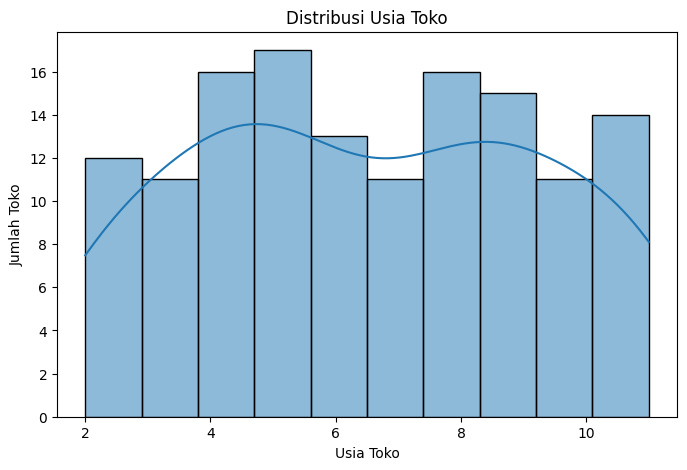

In [7]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Store age"], bins=10, kde=True)
plt.title("Distribusi Usia Toko")
plt.xlabel("Usia Toko")
plt.ylabel("Jumlah Toko")
plt.show()

Dari visualisasi ini didapatkan berapa banyak jumlah toko dalam usia sekian

#### 2. Bar Chart

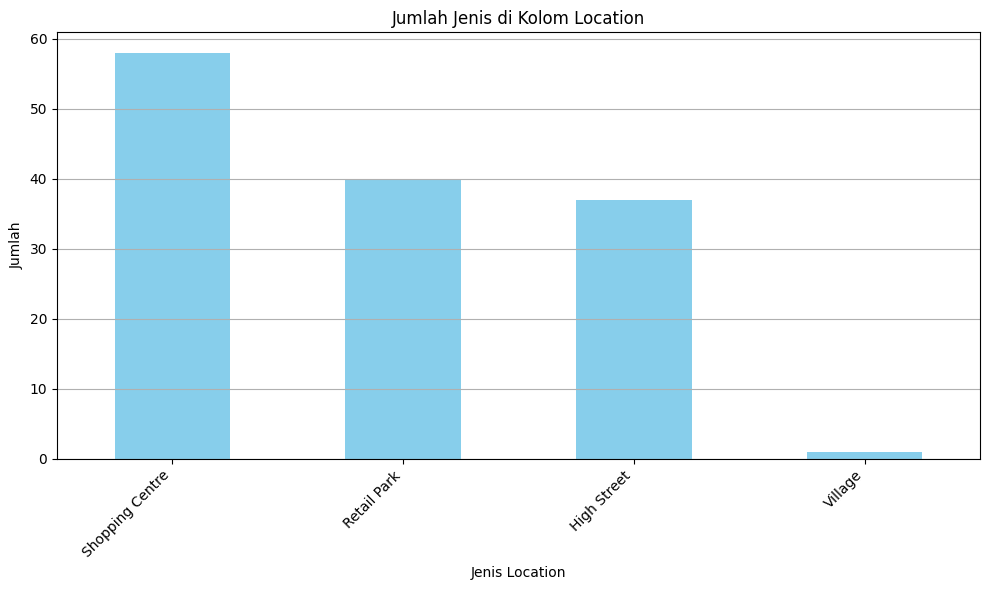

In [8]:
location_counts = df["Location"].value_counts()

# Membuat bar chart berdasarkan jumlah jenis di kolom 'Location'
plt.figure(figsize=(10, 6))
location_counts.plot(
    kind="bar", color="skyblue"
)  # Mengubah warna batang menjadi biru langit
plt.title("Jumlah Jenis di Kolom Location")
plt.xlabel("Jenis Location")
plt.ylabel("Jumlah")
plt.grid(axis="y")  # Menampilkan grid hanya pada sumbu y
plt.xticks(rotation=45, ha="right")  # Mengatur rotasi label x agar lebih mudah dibaca
plt.tight_layout()
plt.show()

Untuk menghitung rata-rata jumlah untuk setiap lokasi (Location)

#### 3. Line Chart

<p>Karena tidak ada kolom dari dataset store yang cocok untuk aplikasi line chart, maka kita akan menggunakan dataset dummy dari library seaborn</p>

<Axes: xlabel='year', ylabel='passengers'>

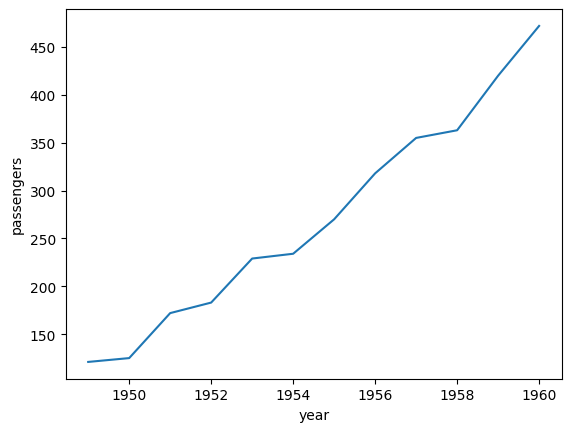

In [9]:
flights = sns.load_dataset("flights")

may_flights = flights.query("month == 'May'")
sns.lineplot(data=may_flights, x="year", y="passengers")

#### 4. Pie Chart

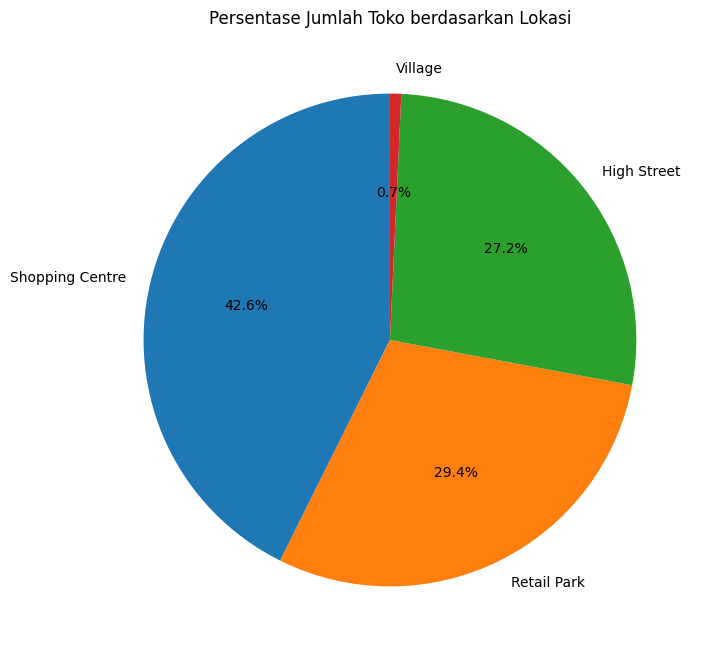

In [10]:
plt.figure(figsize=(8, 8))
location_counts = df["Location"].value_counts()
plt.pie(location_counts, labels=location_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Persentase Jumlah Toko berdasarkan Lokasi")
plt.show()

Dari visualisasi ini dapat dilihat presentasi toko dari tiap lokasi yang ada

### 5. Count Plot

In [11]:
df_copy = df.copy()

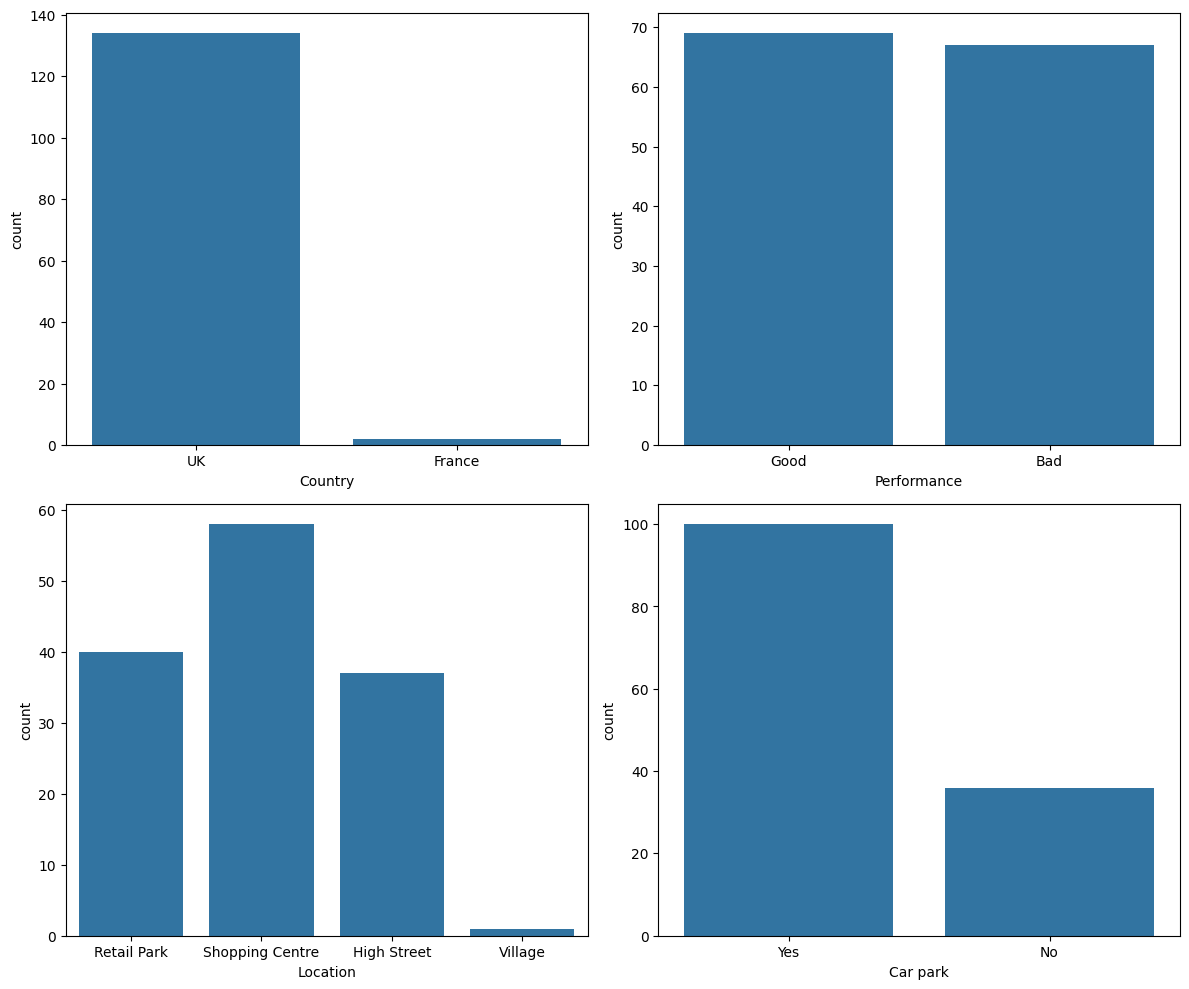

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.countplot(x="Country", data=df_copy, ax=axes[0, 0])
sns.countplot(x="Performance", data=df_copy, ax=axes[0, 1])
sns.countplot(x="Location", data=df_copy, ax=axes[1, 0])
sns.countplot(x="Car park", data=df_copy, ax=axes[1, 1])

plt.tight_layout()

plt.show()

Dari visualisasi ini kita dapat mengetahui jumlah jenis isi dari 4 kolom dalam dataset

Untuk visualisasi lain seperti boxplot, scatterplot, dan heatmap akan ditampilkan dibagian setelah ini langsung dengan studi kasus yang penting diperhatikan

<h3> Handling Categorical Data </h3> <a name="1.4"></a>

<h3>Pengertian Data Categorical</h3>

<p>Data categorial adalah jenis data yang mewakili kategori atau label, bukan nilai numerik yang kontinu. Data ini terdiri dari sejumlah kategori atau kelompok yang berbeda, yang sering kali mewakili atribut atau karakteristik tertentu dari suatu objek. Data kategorial tidak dapat diurutkan secara berurutan, tetapi hanya dapat dikategorikan ke dalam grup yang berbeda. Contoh umum dari data kategorial termasuk jenis kelamin, status pernikahan, kelas sosial, atau jenis produk.</p>

In [13]:
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, OneHotEncoder

le = LabelEncoder()
lb = LabelBinarizer()
oh = OneHotEncoder()

In [14]:
# Copy df for EDA
df_copy = df.copy()

<h3>Metode Encoding</h3>
<p>
Encoding adalah pengubahan data kategorikal yang berbentuk string menjadi angka agar dapat dipahami oleh model. Metode encoding yang akan kita bahas adalah Label Encoder, Label Binarizer, dan One Hot Encoder.
</p>

In [15]:
def handle_encoding(df, method, columns):
    if method == oh:
        for column in columns:
            df_transformed = oh.fit_transform(df[[column]]).toarray()
            df_encoded = pd.DataFrame(
                df_transformed, columns=oh.get_feature_names_out([column])
            )
            df = pd.concat([df, df_encoded], axis=1).drop(columns=column)
    else:
        for column in columns:
            df[column] = method.fit_transform(df[column])

    return df


df = handle_encoding(df, le, ["Country", "Location", "Town"])
df = handle_encoding(df, oh, ["Car park"])
df = handle_encoding(df, lb, ["Performance"])

<p><b>One Hot Encoder</b><br>One-Hot Encoding adalah teknik pengkodean data kategorial yang mengubah setiap nilai kategorial menjadi vektor biner yang menunjukkan keberadaan atau ketiadaan kategori tersebut. Dengan metode ini, setiap kategori diwakili oleh vektor biner di mana hanya satu elemen bernilai 1 (mewakili keberadaan kategori) dan sisanya bernilai 0. One-Hot Encoding cocok digunakan untuk data kategorial yang tidak memiliki urutan atau tingkatan, karena tidak memperkenalkan bias ordinal pada model. Pada contoh ini, One Hot Encoder diterapkan untuk kolom Car park</p>

In [16]:
df[["Car park_No", "Car park_Yes"]]

,Car park_No,Car park_Yes
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
131,0.0,1.0
132,1.0,0.0
133,1.0,0.0
134,1.0,0.0


<p><b>Label Encoder</b><br>Label Encoder adalah teknik pengkodean data kategorial yang mengubah nilai kategorial menjadi nilai numerik. Dalam proses ini, setiap kategori diberi label dengan angka, yang memungkinkan algoritma pembelajaran mesin untuk memahami data kategorial. Label Encoder cocok digunakan untuk data kategorial yang memiliki urutan atau tingkatan, di mana angka yang ditetapkan dapat mengindikasikan urutan atau tingkatan relatif antar kategori. Namun, penggunaan Label Encoder pada data tanpa urutan dapat memperkenalkan bias pada model. Pada contoh ini diterapkan Label Encoding untuk kolom Country, Location, dan Town.</p>

In [17]:
df[["Country", "Location", "Town"]]

,Country,Location,Town
0,1,1,132
1,1,2,95
2,1,1,52
3,1,2,115
4,1,1,32
...,...,...,...
131,1,2,61
132,1,2,12
133,1,2,29
134,1,0,2


<p><b>Label Binarizer</b><br>Label Binarizer adalah metode dalam penerjemahan variabel kategorikal menjadi bentuk biner. Dalam konteks machine learning, Label Binarizer mengubah variabel kategorikal menjadi bentuk biner dengan membuat kolom baru untuk setiap kategori unik dalam variabel tersebut.Misalnya, jika terdapat variabel kategori "warna" dengan nilai-nilai "merah", "biru", dan "hijau", Label Binarizer akan mengubahnya menjadi tiga kolom baru: "warna_merah", "warna_biru", dan "warna_hijau". Jika suatu observasi memiliki warna merah, kolom "warna_merah" akan memiliki nilai 1 dan kolom lainnya akan memiliki nilai 0. Pada contoh ini, diterapkan metode Label Binarizer di kolom Performance.</p>

In [18]:
df[["Performance"]]

,Performance
0,1
1,1
2,0
3,0
4,0
...,...
131,0
132,0
133,0
134,0


<h3>Perbandingan Metode Encoding</h3>

In [19]:
data = ["cold", "cold", "warm", "cold", "hot", "hot", "warm", "cold", "warm", "hot"]
values = np.array(data)
print("Data: ", values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print("Label Encoder:", integer_encoded)

# onehot encode
onehot_encoder = OneHotEncoder(sparse_output=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print("OneHot Encoder:", onehot_encoded)

# Binary encode
lb = LabelBinarizer()
print("Label Binarizer:", lb.fit_transform(values))

Data:  ['cold' 'cold' 'warm' 'cold' 'hot' 'hot' 'warm' 'cold' 'warm' 'hot']
Label Encoder: [0 0 2 0 1 1 2 0 2 1]
OneHot Encoder: [[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
Label Binarizer: [[1 0 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 1 0]]


In [20]:
# Dataframe setelah diencode
df

,Town,Country,Store ID,Manager name,Staff,Floor Space,Window,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance,Car park_No,Car park_Yes
0,132,1,1437,Roger,9,18526,121,10,1,1288374,1138224,1006986,1002340,3,238,16,16.0,1,0.0,1.0
1,95,1,1544,Ella,8,18569,121,11,2,1086225,1015321,1012182,1008436,4,384,15,19.0,1,0.0,1.0
2,52,1,2039,Valentina,-2,12288,105,12,1,1595638,1281661,1104490,1011395,11,219,13,18.0,0,1.0,0.0
3,115,1,2055,Antonia,7,17092,117,14,2,1179395,1022959,1009496,1002169,5,261,15,12.0,0,1.0,0.0
4,32,1,2141,Gabriel,7,11307,103,18,1,1398558,1085170,1003137,1002513,7,200,19,13.0,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,61,1,96853,Vit�ria,7,14120,110,13,2,1665074,1240813,1141898,1041041,6,202,18,14.0,0,0.0,1.0
132,12,1,96858,Mat�as,6,11205,103,15,2,1657769,1424404,1378708,1160929,5,203,13,18.0,0,1.0,0.0
133,29,1,98062,Gustavo,7,16190,115,19,2,1407456,1359511,1200486,1063718,7,341,18,18.0,0,1.0,0.0
134,2,1,98923,Rafael,6,15516,113,17,0,1451087,1245725,1127276,1045154,11,261,14,10.0,0,1.0,0.0


<a href='https://stackoverflow.com/questions/53956573/difference-between-labelencoder-and-labelbinarizer'>Difference Between Label Encoder and Label Binarizer</a>

<h3>Menangani outlier</h3> <a name="1.5"></a>

<p>Outlier adalah observasi yang jauh dari nilai-nilai lain dalam dataset. Mereka bisa menjadi hasil dari kesalahan pengukuran, variabilitas alami dalam populasi, atau bahkan dapat menunjukkan informasi penting atau anomali dalam data</p>

<ul>
    <li><b>Pengaruh terhadap Statistik Deskriptif</b>:Outlier dapat menyebabkan pergeseran yang signifikan dalam rata-rata, median, dan standar deviasi, yang dapat mengaburkan pemahaman tentang karakteristik sebenarnya dari dataset.</li>
    <li><b>Pengaruh terhadap Model Statistik</b>:Outlier dapat mempengaruhi performa model statistik, seperti regresi linear, dengan menyebabkan model untuk salah memahami hubungan antara variabel. Ini dapat mengakibatkan model yang tidak akurat dan prediksi yang buruk</li>
    <li><b>Pengaruh terhadap Kesimpulan dan Keputusan Bisnis</b>:Kesimpulan atau keputusan yang dibuat berdasarkan data yang mengandung outlier dapat menjadi tidak akurat, mengarah pada keputusan yang buruk atau tidak efektif dalam konteks bisnis.</li>
</ul>


<p>Outlier dapat dilihat menggunakan visualisasi Box plot. Box plot adalah metode visualisasi yang digunakan untuk meringkas distribusi data numerik dengan menggambarkan kuartil data serta menampilkan outlier potensial.</p>

<p align="left">
    <img src="./images/outlier_desc.png" width='50%'>

<Axes: >

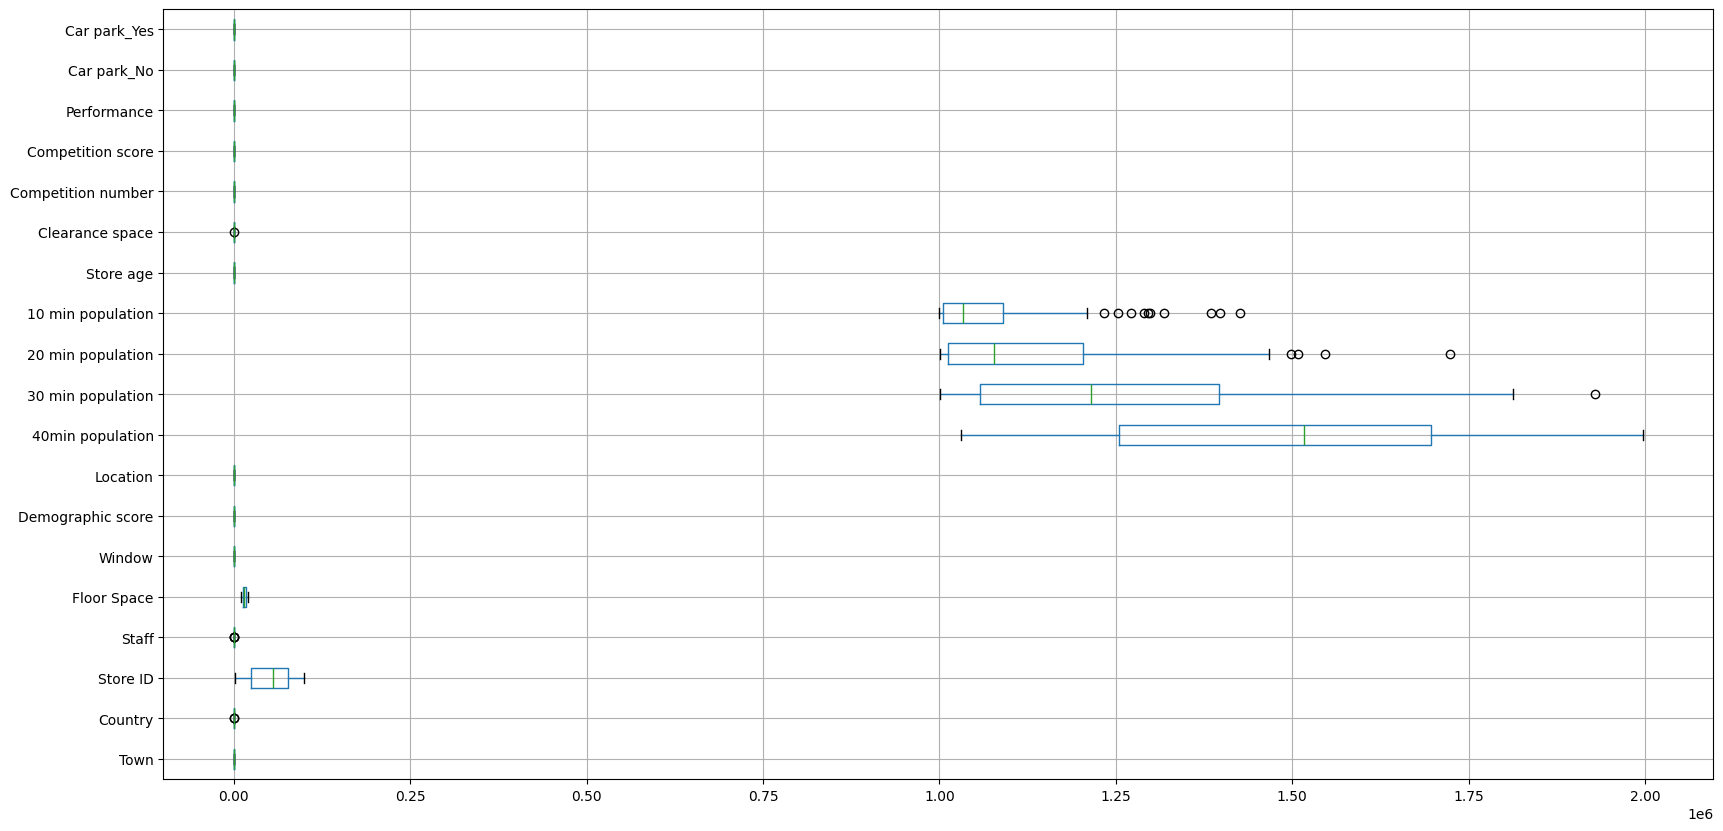

In [21]:
plt.figure(figsize=(20, 10))
df.boxplot(vert=False)

<p>
Dapat dilihat pada kolom 10 min population, 20 min population, dan 30 min population terdapat outlier.
    
Beberapa cara yang dapat dilakukan untuk handling outlier adalah:

<ul>
    <li><b>Drop outlier</b>: Metode ini dapat dilakukan jika jumlah outlier yang ada di dataset terbilang sedikit. Namun metode ini berpotensi merusak pola dalam data dan mengurangi data training.</li>
    <li><b>Diganti dengan nilai konstan</b>: Metode ini juga dapat dilakukan jika jumlah outlier di dataset sedikit dan terjadi secara random. Namun, metode ini berpotensi mengabaikan korelasi atau pola dalam data dan bisa saja mengakibatkan bias dalam data</li>
    <li><b>Diganti dengan nilai mean, median, atau modus (imputasi)</b>: Metode ini memiliki kelebihan yaitu dapat mempertahankan central tendency dalam data. Namun juga dapat berpotensi untuk mengabaikan korelasi atau pola dalam data.</li>
    <li><b>Menggunakan winsorizer</b>: Winsorizing adalah cara menangani outlier dengan menetapkan outlier ke nilai suatu kuartil dari data. Sebagai contoh, 90% winsorization berarti semua nilai dalam kolom yang lebih tinggi dari 95% kuartil ke-3 akan disesuaikan ke nilai kuartil ke-3. Metode ini cocok dalam menghilangkan outlier dan menjaga keutuhan dataset, namun dapat menyebabkan distorsi data dan mengubah distribusi data asli dan membuat analisis lebih sulit atau tidak akurat.</li>
</ul>    

Dalam contoh disini, kita akan menggunakan fungsi Winsorizer untuk membuat cap pada kolom yang memiliki outlier.
</p>

In [22]:
from feature_engine.outliers import Winsorizer

windsorizer = Winsorizer(
    capping_method="iqr",
    tail="both",
    fold=1.5,
    variables=["10 min population", "20 min population", "30 min population"],
)

In [23]:
windsorizer.fit(df)

Winsorizer(capping_method='iqr', fold=1.5, tail='both',
           variables=['10 min population', '20 min population',
                      '30 min population'])

In [24]:
df = windsorizer.transform(df)

In [25]:
df

,Town,Country,Store ID,Manager name,Staff,Floor Space,Window,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance,Car park_No,Car park_Yes
0,132,1,1437,Roger,9,18526,121,10,1,1288374,1138224.0,1006986.0,1002340,3,238,16,16.0,1,0.0,1.0
1,95,1,1544,Ella,8,18569,121,11,2,1086225,1015321.0,1012182.0,1008436,4,384,15,19.0,1,0.0,1.0
2,52,1,2039,Valentina,-2,12288,105,12,1,1595638,1281661.0,1104490.0,1011395,11,219,13,18.0,0,1.0,0.0
3,115,1,2055,Antonia,7,17092,117,14,2,1179395,1022959.0,1009496.0,1002169,5,261,15,12.0,0,1.0,0.0
4,32,1,2141,Gabriel,7,11307,103,18,1,1398558,1085170.0,1003137.0,1002513,7,200,19,13.0,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,61,1,96853,Vit�ria,7,14120,110,13,2,1665074,1240813.0,1141898.0,1041041,6,202,18,14.0,0,0.0,1.0
132,12,1,96858,Mat�as,6,11205,103,15,2,1657769,1424404.0,1378708.0,1160929,5,203,13,18.0,0,1.0,0.0
133,29,1,98062,Gustavo,7,16190,115,19,2,1407456,1359511.0,1200486.0,1063718,7,341,18,18.0,0,1.0,0.0
134,2,1,98923,Rafael,6,15516,113,17,0,1451087,1245725.0,1127276.0,1045154,11,261,14,10.0,0,1.0,0.0


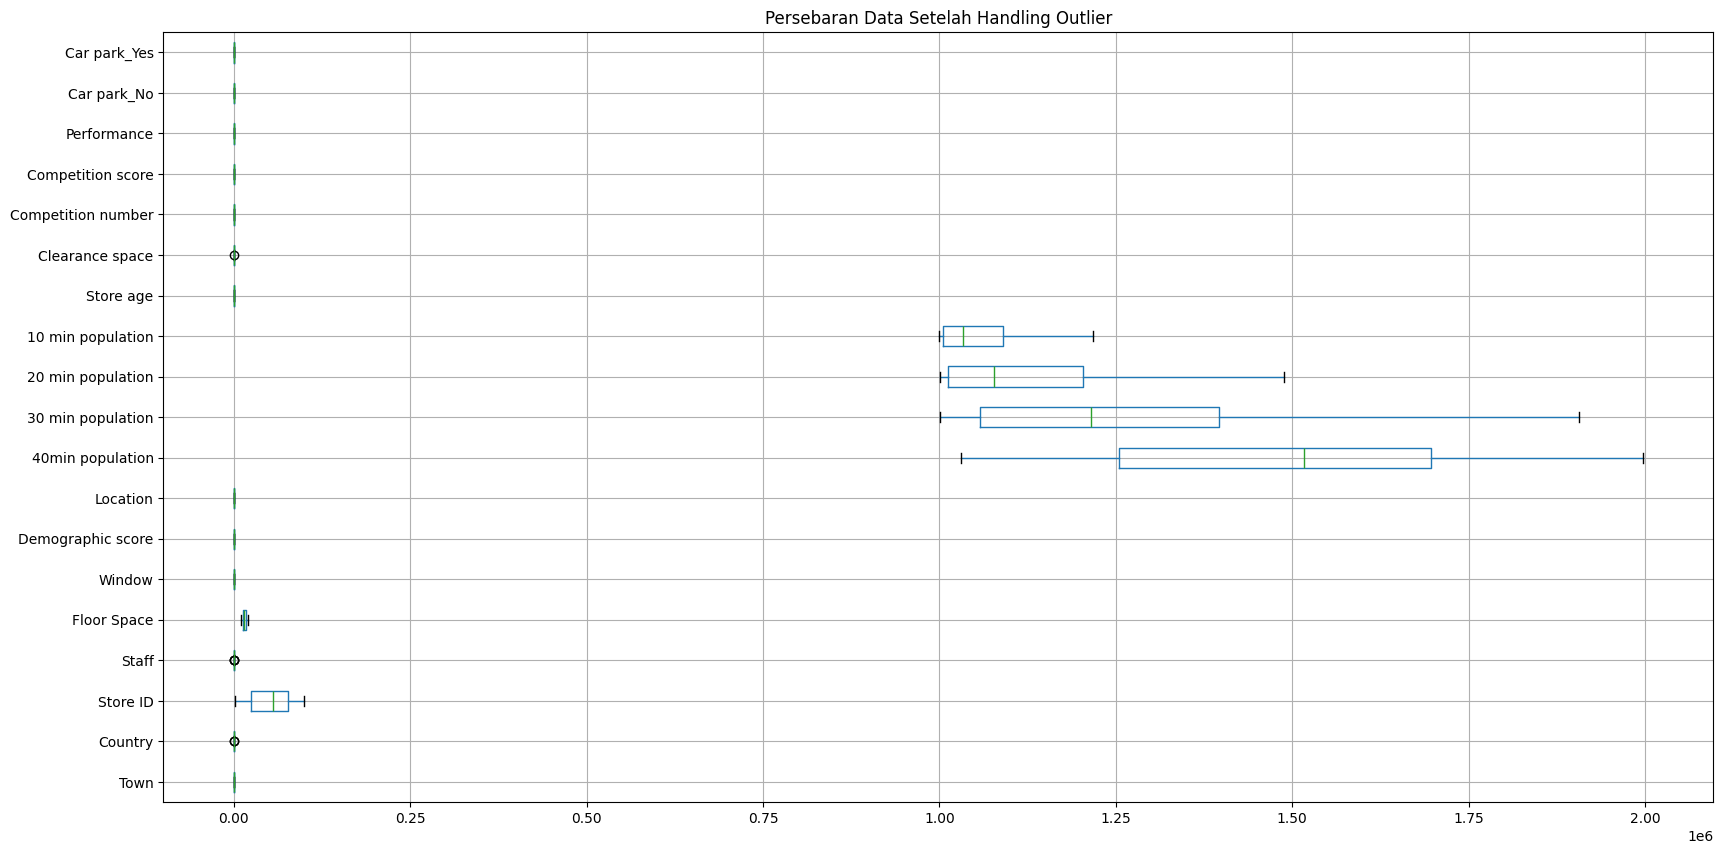

In [26]:
plt.figure(figsize=(20, 10))
df.boxplot(vert=False)
plt.title("Persebaran Data Setelah Handling Outlier")
plt.show()

C:\Users\LOQ\AppData\Local\Temp\ipykernel_31140\1181671629.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


array([[<Axes: title={'center': 'Town'}>,
        <Axes: title={'center': 'Country'}>,
        <Axes: title={'center': 'Store ID'}>,
        <Axes: title={'center': 'Staff'}>],
       [<Axes: title={'center': 'Floor Space'}>,
        <Axes: title={'center': 'Window'}>,
        <Axes: title={'center': 'Demographic score'}>,
        <Axes: title={'center': 'Location'}>],
       [<Axes: title={'center': '40min population'}>,
        <Axes: title={'center': '30 min population'}>,
        <Axes: title={'center': '20 min population'}>,
        <Axes: title={'center': '10 min population'}>],
       [<Axes: title={'center': 'Store age'}>,
        <Axes: title={'center': 'Clearance space'}>,
        <Axes: title={'center': 'Competition number'}>,
        <Axes: title={'center': 'Competition score'}>],
       [<Axes: title={'center': 'Performance'}>,
        <Axes: title={'center': 'Car park_No'}>,
        <Axes: title={'center': 'Car park_Yes'}>, <Axes: >]], dtype=object)

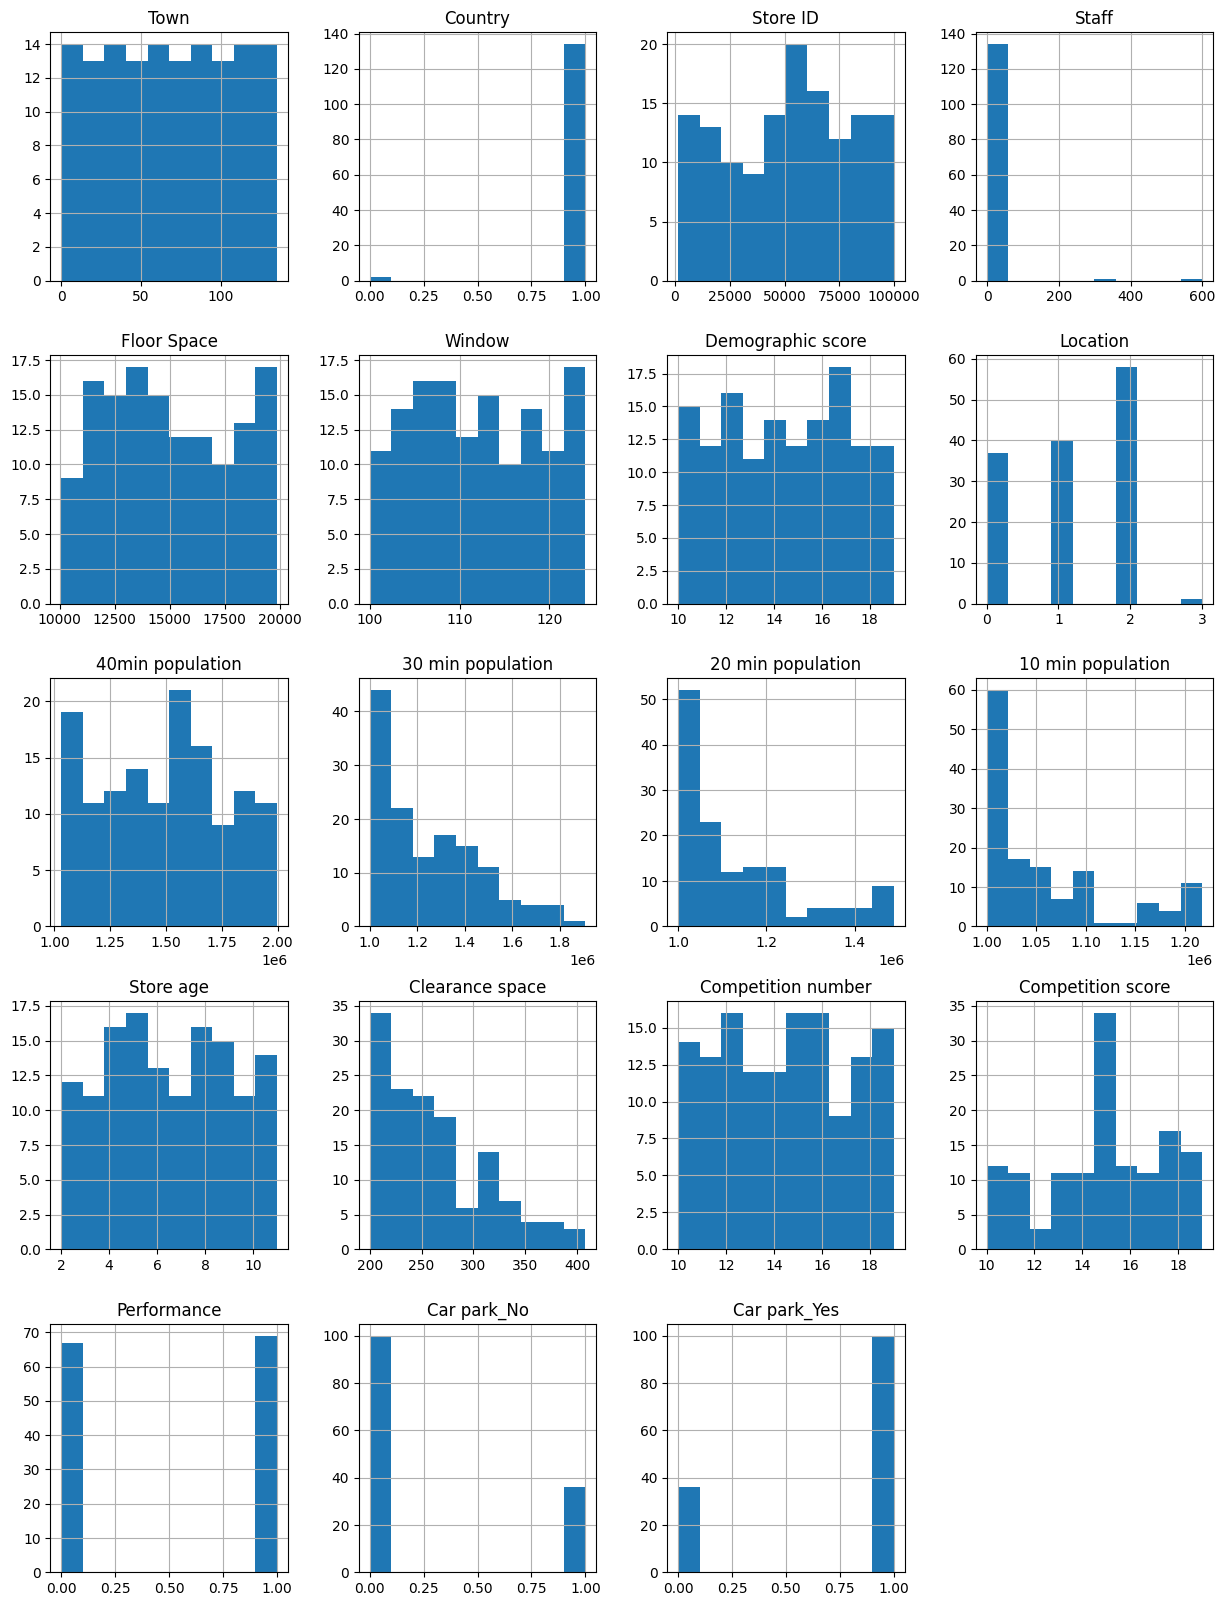

In [27]:
fig = plt.figure(figsize=(15, 20))
ax = fig.gca()
df.hist(ax=ax)

<p>Sebelum melakukan normalisasi dan Feature Selection, kita akan melakukan splitting dataset menjadi dataset untuk training dan testing terlebih dahulu.</p>

In [28]:
from sklearn.model_selection import train_test_split

# Drop kolom manager name karena tidak punya korelasi yang signifikan
df.drop(columns="Manager name", inplace=True)

X = df.drop(columns=["Performance"])
y = df["Performance"]

<h3>Normalization</h3> <a name="1.6"></a>

<p>Dalam konteks data ilmiah dan analisis data, normalisasi mengacu pada proses mengubah nilai-nilai dari berbagai fitur dalam dataset ke skala umum, sehingga setiap fitur memiliki rentang nilai yang serupa. Normalisasi penting karena beberapa algoritma pembelajaran mesin memerlukan data yang telah dinormalisasi untuk bekerja secara efisien dan memberikan hasil yang akurat.

Tujuan normalisasi adalah untuk memastikan bahwa setiap fitur memiliki dampak yang seimbang pada analisis dan model yang sedang dibangun. Hal ini membantu mencegah fitur dengan rentang nilai yang besar mendominasi model, sementara fitur dengan rentang nilai yang lebih kecil diabaikan. Dengan normalisasi, algoritma pembelajaran mesin dapat belajar dari setiap fitur dengan cara yang seimbang, sehingga menghasilkan model yang lebih akurat dan andal.</p>

<h3>Jenis Normalisasi</h3>

<p><b>Min-Max Scaling</b><br> Ideal digunakan ketika Anda memiliki pemahaman yang jelas tentang rentang nilai maksimum dan minimum dari fitur Anda, dan Anda ingin menormalkan data ke rentang spesifik, misalnya 0 hingga 1. Metode ini cocok untuk data yang tidak memiliki distribusi normal atau ketika Anda ingin mempertahankan interpretasi asli dari data</p>

In [29]:
data = {
    "Feature1": [100, 200, 300, 400, 500],
    "Feature2": [10, 20, 30, 40, 50],
    "Feature3": [5, 10, 15, 20, 25],
}


dummy_df = pd.DataFrame(data)


print("Dataframe asli: \n", dummy_df)

Dataframe asli: 
    Feature1  Feature2  Feature3
0       100        10         5
1       200        20        10
2       300        30        15
3       400        40        20
4       500        50        25


In [30]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler_minmax = MinMaxScaler()

df_scaled = scaler_minmax.fit_transform(dummy_df)
df_scaled = pd.DataFrame(df_scaled, columns=dummy_df.columns)

# Menampilkan DataFrame setelah scaling
print("DataFrame setelah Min-Max Scaling:")
print(df_scaled)

DataFrame setelah Min-Max Scaling:
   Feature1  Feature2  Feature3
0      0.00      0.00      0.00
1      0.25      0.25      0.25
2      0.50      0.50      0.50
3      0.75      0.75      0.75
4      1.00      1.00      1.00


<p><b>Z-Score Normalization</b><br> Cocok digunakan ketika Anda ingin memastikan bahwa data Anda memiliki rata-rata nol dan simpangan baku satu. Metode ini berguna ketika data Anda memiliki distribusi normal atau mendekati distribusi normal, dan Anda ingin menghilangkan perbedaan skala yang besar antara fitur-fitur yang berbeda. Z-Score Normalization juga cocok untuk penggunaan algoritma yang bergantung pada asumsi normalitas data.</p>

In [31]:
scaler = StandardScaler()

df_normalized = scaler.fit_transform(dummy_df)
df_normalized = pd.DataFrame(df_normalized, columns=dummy_df.columns)

# Menampilkan DataFrame setelah normalisasi
print("DataFrame setelah Z-Score Normalization:")
print(df_normalized)

DataFrame setelah Z-Score Normalization:
   Feature1  Feature2  Feature3
0 -1.414214 -1.414214 -1.414214
1 -0.707107 -0.707107 -0.707107
2  0.000000  0.000000  0.000000
3  0.707107  0.707107  0.707107
4  1.414214  1.414214  1.414214


<p><b>Normalization by Decimal Scaling</b><br> Digunakan ketika Anda ingin melakukan normalisasi dengan menggeser koma desimal dari setiap nilai fitur, sehingga nilai-nilai tersebut jatuh dalam rentang tertentu, seperti antara -1 dan 1. Metode ini berguna ketika Anda ingin menjaga signifikansi angka dan mengurangi kompleksitas perhitungan. Normalization by Decimal Scaling cocok untuk kasus di mana interpretasi data sangat penting dan Anda ingin mempertahankan representasi numerik asli.</p>

In [32]:
# Mencari jumlah digit maksimal dalam kolom
max_digits = dummy_df.applymap(lambda x: len(str(x))).max()

# Menghitung skala
scale = 10 ** (max_digits - 1)

# Normalisasi by Decimal Scaling pada DataFrame
df_normalized = dummy_df / scale

# Menampilkan DataFrame setelah normalisasi
print("DataFrame setelah Normalization by Decimal Scaling:")
print(df_normalized)

DataFrame setelah Normalization by Decimal Scaling:
   Feature1  Feature2  Feature3
0       1.0       1.0       0.5
1       2.0       2.0       1.0
2       3.0       3.0       1.5
3       4.0       4.0       2.0
4       5.0       5.0       2.5


C:\Users\LOQ\AppData\Local\Temp\ipykernel_31140\3330729354.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  max_digits = dummy_df.applymap(lambda x: len(str(x))).max()


<h3>Bagaimana menentukan normalisasi yang tepat untuk data</h3>

<p>Langkah pertama yang dilakukan adalah melakukan pembentukan histogram. Berdasarkan visualisasi data, data dikatan terdistribusi normal apabila memenuhi poin-poin berikut.

<ul>
    <li><b>Simetri</b>: Distribusi normal simetris terhadap nilai tengahnya. Ini berarti bahwa bagian kanan distribusi mirip dengan bagian kirinya jika dilipat di tengah.</li>
    <li><b>Kurtosis</b>: Distribusi normal memiliki kurtosis (tingkat puncaknya) yang moderat, artinya tidak terlalu runcing atau datar. Puncaknya biasanya berbentuk lonceng.</li>
    <li><b>Skewness</b>: Distribusi normal memiliki skewness nol, yang berarti tidak ada kemiringan ke kanan atau kiri. Hal ini menunjukkan bahwa ekor distribusi di kedua sisi kurva normal cenderung simetris.</li>
    <li><b>Distribusi Persentil</b>: Dalam distribusi normal, nilai persentil akan mengikuti pola tertentu. Misalnya, 50% dari data akan berada di sekitar mean, 68% dari data akan berada dalam satu standar deviasi dari mean, dan 95% dari data akan berada dalam dua standar deviasi dari mean.</li>
    <li><b>Histogram</b>: Bentuk histogram distribusi normal menyerupai lonceng, dengan puncaknya di tengah dan ekornya yang menyebar ke kiri dan kanan.</li>
</ul>
</p>

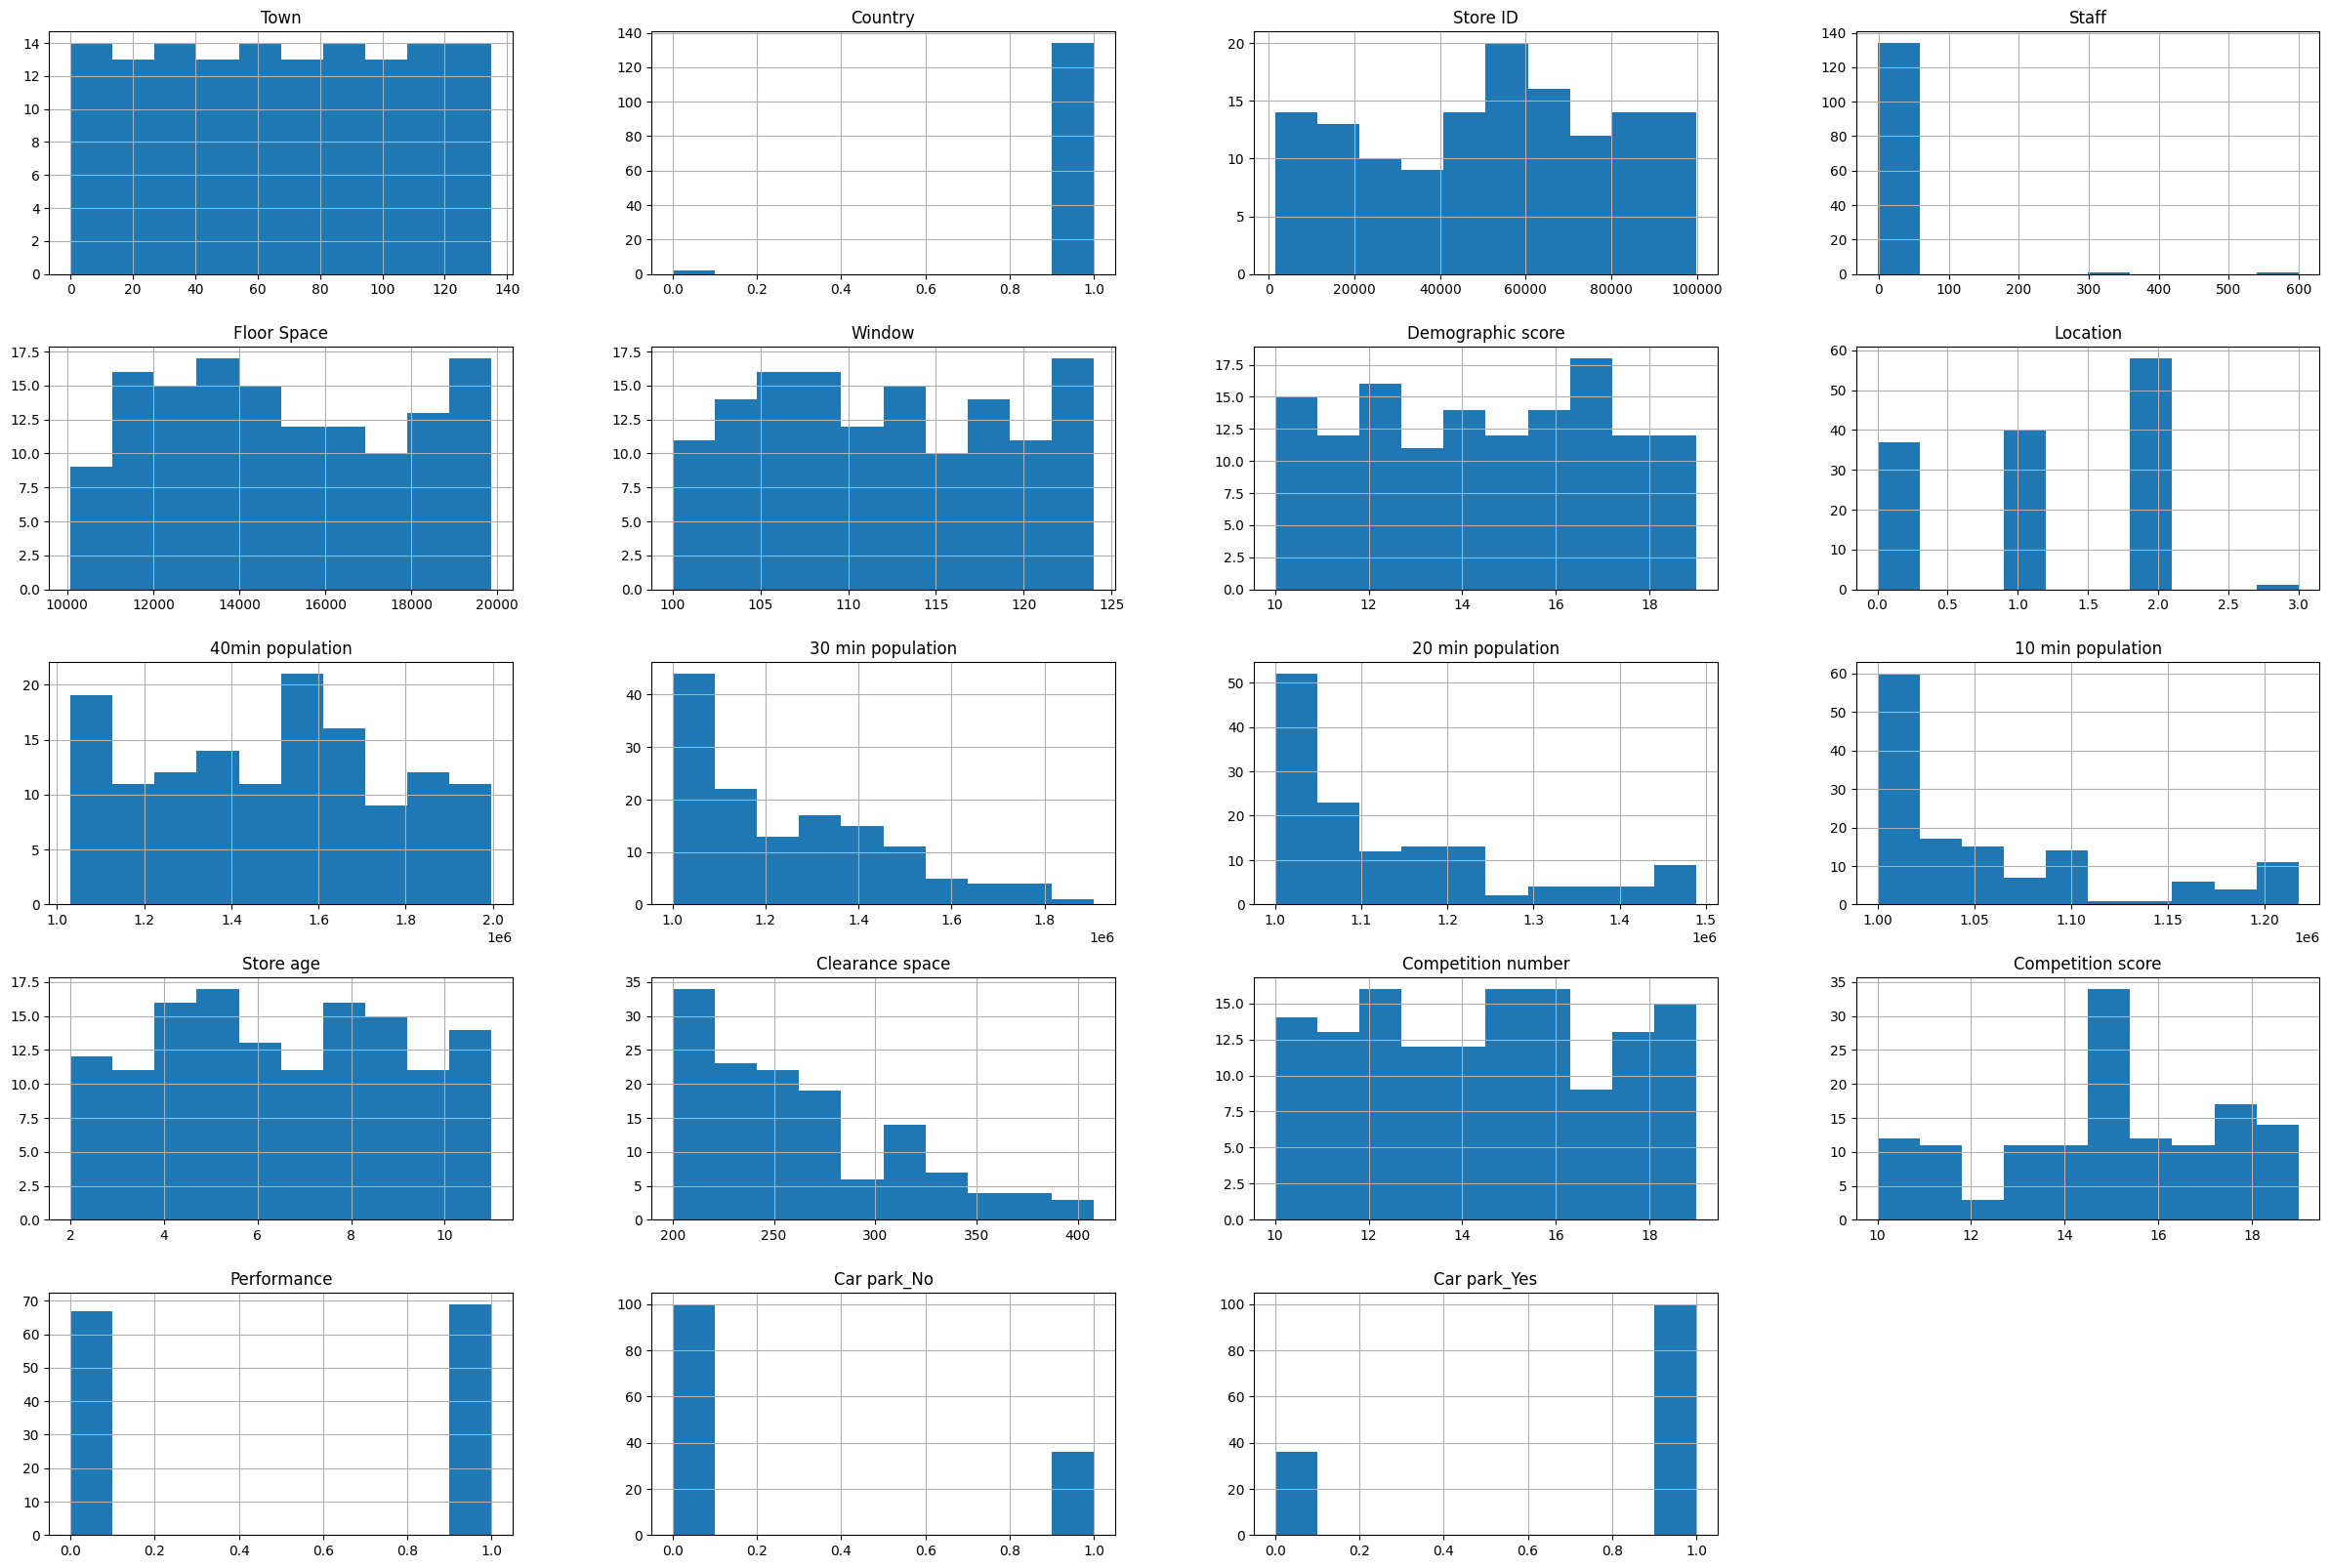

In [33]:
df.hist(figsize=(30, 20), bins=10)
plt.show()

Dapat disimpulkan bahwa distribusi sudah normal pada kebanyakan kolom pada data. Akan digunakan Z-Score Normalization untuk melakukan normalisasi.

In [34]:
# Split dataframe menjadi data testing dan training
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

<h3>Principal Component Analysis</h3> <a name="1.7"></a>

<p>PCA (Principal Component Analysis) adalah teknik reduksi dimensi yang digunakan untuk mengurangi kompleksitas dataset dengan memproyeksikan data dari ruang fitur yang tinggi ke ruang fitur yang lebih rendah. Tujuannya adalah untuk mempertahankan sebanyak mungkin informasi penting dalam data dengan menggunakan jumlah komponen yang lebih sedikit. 

Dengan menggunakan PCA, dimensi data dapat dikurangi dengan memilih sejumlah komponen utama yang paling penting, sementara sebagian besar variasi dalam data tetap dipertahankan. Dengan demikian, PCA dapat membantu mengatasi masalah dimensi tinggi, mempercepat waktu komputasi, dan mengurangi overfitting, sehingga meningkatkan performa model secara keseluruhan.
</p>

In [35]:
from sklearn.decomposition import PCA

n_components = 0.95

# Membuat objek PCA
pca = PCA(n_components=n_components)

X_pca = pca.fit_transform(X)

# Menampilkan hasil reduksi dimensi
print("Original Shape:", X.shape)
print("Reduced Shape:", X_pca.shape)

Original Shape: (136, 18)
Reduced Shape: (136, 3)


In [36]:
df_pca = pd.DataFrame(X_pca, columns=["Feature 1", "Feature 2", "Feature 3"])

In [37]:
df_pca

,Feature 1,Feature 2,Feature 3
0,-260175.450292,3923.875991,-59612.089708
1,-479710.400681,-53359.626030,7781.465182
2,85226.619396,69654.204474,-51922.657968
3,-405790.635579,3898.949933,3335.410686
4,-205811.442698,108714.224535,-27561.089637
...,...,...,...
131,132301.054002,118592.517062,16127.863961
132,316640.798740,-120771.497222,128319.913372
133,20840.822717,-148299.695414,-10806.160721
134,-33070.640546,-16045.904008,-5286.979013


<h2> Feature Selection </h2> <a name="1.8"></a>

<p>Feature selection adalah proses yang memilih subset fitur dari fitur keseluruhan sehingga fitur yang digunakan untuk melatih model dikurangi secara optimal sesuai dengan kriteria tertentu. Salah satu cara untuk melakukan Feature Selection adalah dengan metode RFE.</p>

<p>RFE atau Recursive Feature Elimination adalah salah satu metode dalam feature selection yang digunakan untuk memilih fitur yang paling penting dari dataset. Metode ini bekerja dengan cara mengeliminasi fitur secara bertahap berdasarkan kontribusinya terhadap model yang sedang dipelajari.</p>

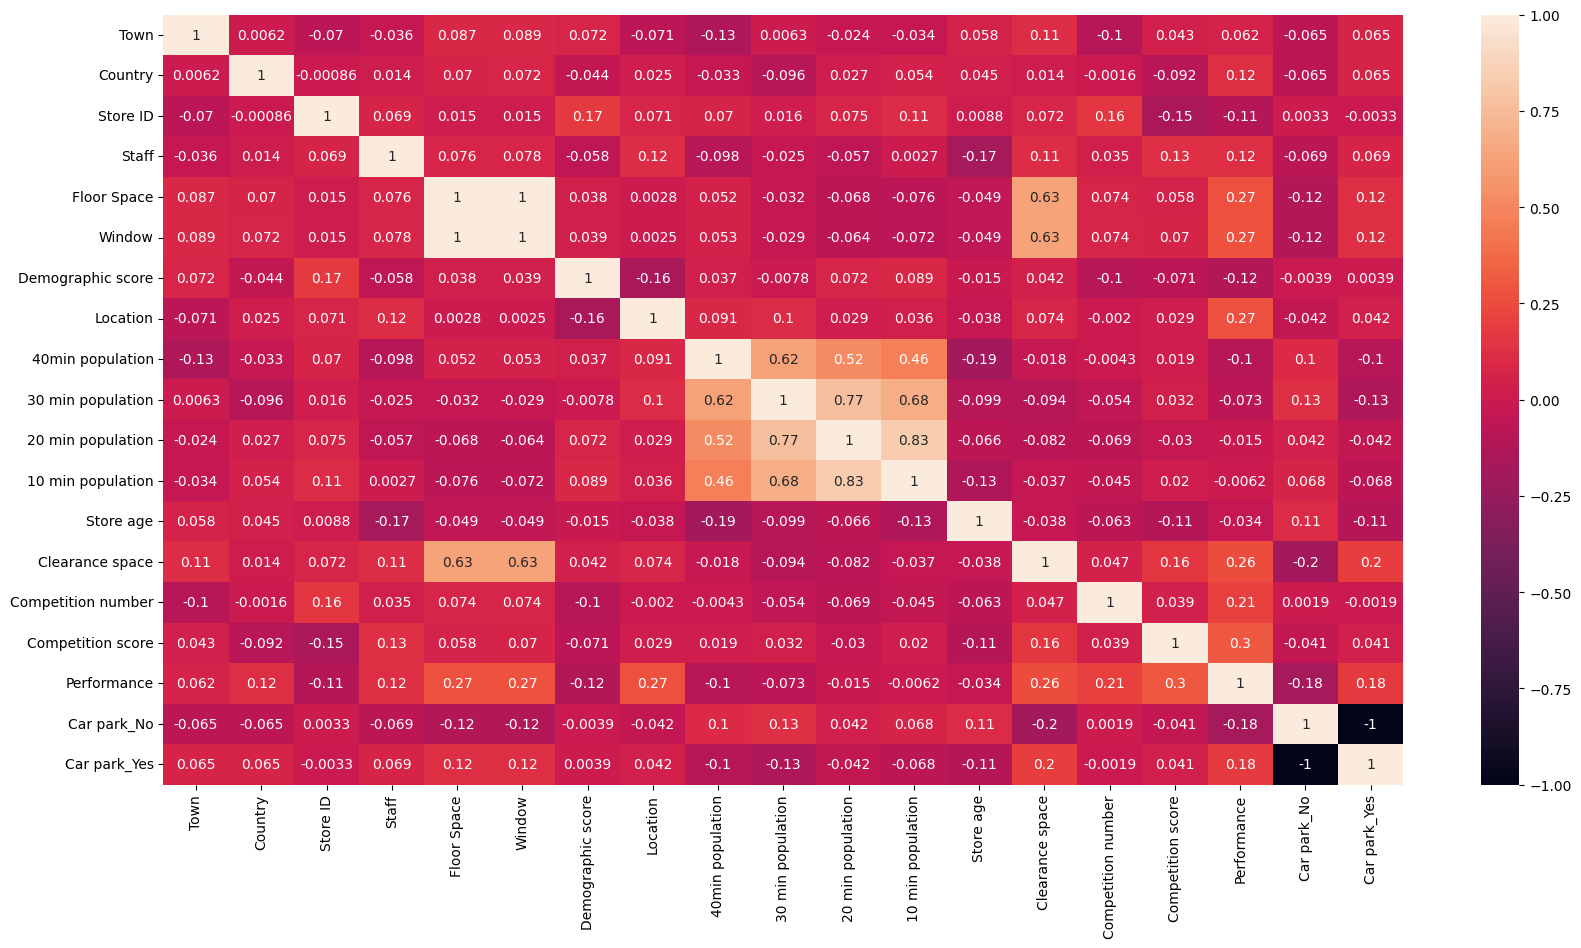

In [38]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(df.corr(method="pearson"), annot=True, ax=ax)

plt.show()

## B. Preprocessing Data Teks <a name="datateks"></a>

<h2>Mengapa Preprocessing Data Teks Penting?</h2> <a name="2.1"></a>

<p>Prapemrosesan teks merupakan langkah penting dalam Natural Language Processing (NLP) yang melibatkan pembersihan dan transformasi data teks tidak terstruktur untuk mempersiapkannya untuk analisis. Data teks mentah sering kali berisik dan tidak terstruktur, berisi berbagai ketidakkonsistenan seperti kesalahan ketik, bahasa gaul, singkatan, dan informasi yang tidak relevan. Praproses membantu dalam:

<ul>
    <li><b>Meningkatkan Kualitas Data</b>: Menghilangkan noise dan informasi yang tidak relevan untuk memastikan bahwa data yang dimasukkan ke dalam model bersih dan konsisten.</li>
    <li><b>Meningkatkan Kinerja Model</b>: Teks yang diproses dengan baik dapat menghasilkan ekstraksi fitur yang lebih baik, sehingga meningkatkan kinerja model NLP.</li>
    <li><b>Mengurangi Kompleksitas</b>: Menyederhanakan data teks dapat mengurangi kompleksitas komputasi dan membuat model lebih efisien.</li>

<p align="center">
    <img src="./images/text_preprocessing.png" width='30%'>

<p>Salah satu library yang paling sering digunakan untuk melakukan prapemrosesan data teks adalah Natural Language Toolkit atau disingkat NLTK. NLTK adalah libray python untuk bekerja dengan permodelan teks. NLTK menyediakan alat yang baik mempersiapkan teks sebelum digunakan pada machine learning atau algoritma deep learning.</p>

<h3> Case Folding </h3> <a name="2.2"></a>

<p>Case Folding merupakan salah satu teknik prapemrosesan data teks untuk mengubah huruf kapital (uppercase) pada teks menjadi huruf kecil (lowercase). Teknik ini bertujuan untuk memberikan bentuk standar pada teks, sehingga NLP dapat mengidentifikasi teks tanpa harus mempertimbangkan adanya uppercase atau lowercase pada teks. Dengan adanya standarisasi ini, model NLP akan memperlakukan kata seperti "Halo", "HALO", dan "halo" sebagai token yang sama. Adapun keuntungan lain dari case folding adalah:

<ul>
    <li>Mengurangi dimensi fitur karena kata yang sama dengan kapitalisasi berbeda ("Belajar", "belajar", "BELAJAR") akan diperlakukan sebagai kata yang sama</li>
    <li>Menyederhanakan proses tokenisasi dan pembuatan kamus kata (vocabulary).</li>
    <li>Meningkatkan akurasi model dengan menghilangkan perbedaan yang tidak penting secara semantik</li>
    <li>Merupakan teknik yang wajib dilakukan disaat mengolah data teks mentah sebelum berlanjut ke tokenisasi.</li>
</ul>

</p>

In [39]:
import nltk
from nltk.tokenize import word_tokenize

# Contoh kalimat
kalimat = "Pada Modul 1 praktikum Artificial Intelligence, kita akan mempelajari tentang Text Preprocessing"

# Langkah 1: Case folding (mengubah semua ke lowercase)
print ("Sebelum case folding:")
print(kalimat)
kalimat_lower = kalimat.lower()
print("Setelah case folding:")
print(kalimat_lower)

Sebelum case folding:
Pada Modul 1 praktikum Artificial Intelligence, kita akan mempelajari tentang Text Preprocessing
Setelah case folding:
pada modul 1 praktikum artificial intelligence, kita akan mempelajari tentang text preprocessing


<h3>Menghapus Angka dan Tanda Baca</h3> <a name="2.3"></a>

<p>Pada sebagian besar tugas NLP, angka dan tanda baca tidak membawa nilai semantik yang besar, oleh karena itu penghapusan tanda baca sangat disarankan. Menghapus angka dan tanda baca seperti [!”#$%&’()*+,-./:;<=>?@[\]^_`{|}~] dapat dilakukan di pyhton menggunakan library Regular Expression (regex)</p>

In [40]:
import re # import library regex
# Contoh kalimat
teks = "ini &adalah [contoh] kalimat? {dengan tanda. baca?!! dan angka44441"

def hapus_angka_tanda_baca(teks):
    return re.sub(r'[^\w\s]|\d', '', teks)

print("Teks asli:")
print(teks)

print("\nSetelah penghapusan tanda baca dan angka:")
print(hapus_angka_tanda_baca(teks))

Teks asli:
ini &adalah [contoh] kalimat? {dengan tanda. baca?!! dan angka44441

Setelah penghapusan tanda baca dan angka:
ini adalah contoh kalimat dengan tanda baca dan angka


<h3>Tokenizing</h3> <a name="2.4"></a>

<p>Tokenizing merupakan proses pemisahan teks menjadi potongan-potongan yang disebut sebagai token untuk kemudian di analisa. Kata, angka, simbol, tanda baca dan entitas penting lainnya dapat dianggap sebagai token. Dalam konteks NLP, token diartikan sebagai “kata” meskipun tokenize juga dapat dilakukan pada paragraf maupun kalimat.</p>

In [41]:
#Menggunakan split bawaan python
kalimat = "Nico adalah asisten praktikum AI"
pisah = kalimat.split() 
print(pisah)

#tokenisasi dengan nltk
import nltk
from nltk.tokenize import word_tokenize 
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab')

kalimat = "Sighra, Afif, Wikri, Awang, dan Steven adalah asisten praktikum AI."
    
tokens = word_tokenize(kalimat)
print(tokens)

['Nico', 'adalah', 'asisten', 'praktikum', 'AI']
['Sighra', ',', 'Afif', ',', 'Wikri', ',', 'Awang', ',', 'dan', 'Steven', 'adalah', 'asisten', 'praktikum', 'AI', '.']


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\LOQ\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


<p>Dari output kode diatas terdapat kemunculan tanda baca titik(.) dan koma (,) serta token yang masih menggunakan huruf besar pada awal kata. Hal tersebut nantinya dapat menggangu proses perhitungan dalam penerapan algoritma. Jadi, sebaiknya teks telah melewati tahap case folding sebelum di tokenize agar menghasilkan hasil yang lebih konsisten.</p>

<p>Kita juga bisa mendapatkan informasi frekuensi kemunculan setiap token dengan kelas FreqDist() yang sudah tersedia pada modul NLTK.</p>

In [42]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import string
kalimat_raw = "Machine Learning (ML) adalah cabang kecerdasan buatan yang memungkinkan komputer belajar dari data untuk membuat prediksi atau keputusan tanpa diprogram secara eksplisit. ML terbagi menjadi tiga jenis utama: Supervised Learning, yang menggunakan data berlabel untuk pelatihan, Unsupervised Learning, yang mengidentifikasi pola dari data tanpa label, dan Reinforcement Learning, yang belajar melalui trial and error dengan sistem reward. Teknologi ini banyak digunakan dalam berbagai bidang seperti rekomendasi produk, deteksi penipuan, diagnosis medis, kendaraan otonom, dan prediksi kegagalan mesin, menjadikannya solusi inovatif dalam berbagai industri."
kalimat = kalimat_raw.translate(str.maketrans('','',string.punctuation)).lower()
 
tokens = nltk.tokenize.word_tokenize(kalimat)
kemunculan = nltk.FreqDist(tokens)
print(kemunculan.most_common())

[('learning', 4), ('yang', 4), ('data', 3), ('ml', 2), ('belajar', 2), ('dari', 2), ('untuk', 2), ('prediksi', 2), ('tanpa', 2), ('dan', 2), ('dalam', 2), ('berbagai', 2), ('machine', 1), ('adalah', 1), ('cabang', 1), ('kecerdasan', 1), ('buatan', 1), ('memungkinkan', 1), ('komputer', 1), ('membuat', 1), ('atau', 1), ('keputusan', 1), ('diprogram', 1), ('secara', 1), ('eksplisit', 1), ('terbagi', 1), ('menjadi', 1), ('tiga', 1), ('jenis', 1), ('utama', 1), ('supervised', 1), ('menggunakan', 1), ('berlabel', 1), ('pelatihan', 1), ('unsupervised', 1), ('mengidentifikasi', 1), ('pola', 1), ('label', 1), ('reinforcement', 1), ('melalui', 1), ('trial', 1), ('and', 1), ('error', 1), ('dengan', 1), ('sistem', 1), ('reward', 1), ('teknologi', 1), ('ini', 1), ('banyak', 1), ('digunakan', 1), ('bidang', 1), ('seperti', 1), ('rekomendasi', 1), ('produk', 1), ('deteksi', 1), ('penipuan', 1), ('diagnosis', 1), ('medis', 1), ('kendaraan', 1), ('otonom', 1), ('kegagalan', 1), ('mesin', 1), ('menjadik

<p>Untuk memvisualisasikan jumlah masing-masing kata yang muncul, kita dapat menggunakan library matplotlib ataupun WordCloud<p>

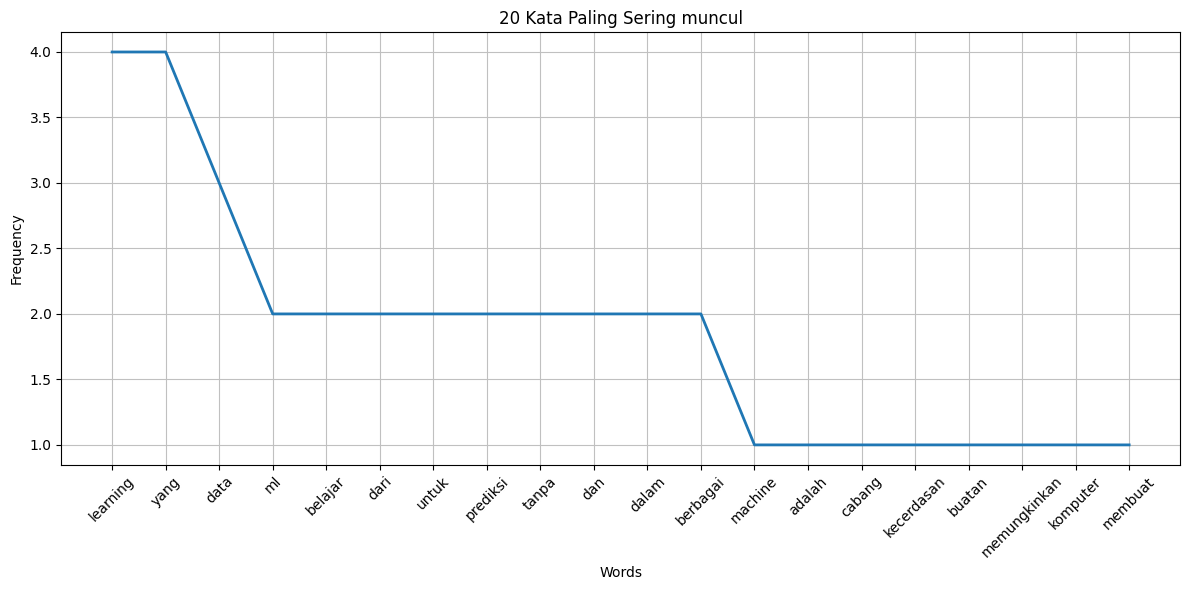

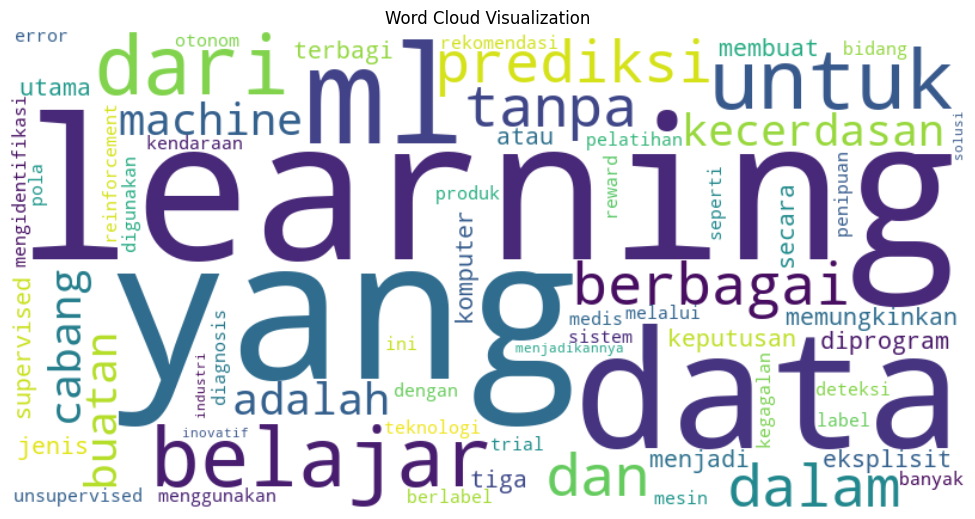

In [43]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Matplotlib
plt.figure(figsize=(12, 6))
kemunculan.plot(20, cumulative=False)
plt.title('20 Kata Paling Sering muncul')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# WordCloud
wordcloud = WordCloud(
    width=800, 
    height=400,
    background_color='white',
    stopwords=None,
    min_font_size=10,
    colormap='viridis'  # Adding colormap for better visualization
).generate(kalimat)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Word Cloud Visualization')
plt.tight_layout(pad=0)
plt.show()

Tokenizing tidak hanya dapat diterapkan untuk memisahkan kata, namun juga dapat digunakan untuk memisahkan kalimat pada paragraf. Berikut adalah contoh penggunaan tokenizing untuk memisahkan kalimat pada paragraf menggunakan `sent_tokenize` pada library NLTK

In [44]:
from nltk.tokenize import sent_tokenize

tokens = nltk.tokenize.sent_tokenize(kalimat_raw)
print(tokens)

['Machine Learning (ML) adalah cabang kecerdasan buatan yang memungkinkan komputer belajar dari data untuk membuat prediksi atau keputusan tanpa diprogram secara eksplisit.', 'ML terbagi menjadi tiga jenis utama: Supervised Learning, yang menggunakan data berlabel untuk pelatihan, Unsupervised Learning, yang mengidentifikasi pola dari data tanpa label, dan Reinforcement Learning, yang belajar melalui trial and error dengan sistem reward.', 'Teknologi ini banyak digunakan dalam berbagai bidang seperti rekomendasi produk, deteksi penipuan, diagnosis medis, kendaraan otonom, dan prediksi kegagalan mesin, menjadikannya solusi inovatif dalam berbagai industri.']


<h3>Stemming</h3> <a name="2.5"></a>
<p>Stemming adalah proses dalam preprocessing teks yang mengubah kata ke bentuk dasarnya (root word) dengan menghapus akhiran atau imbuhan tanpa memperhatikan konteks gramatikalnya. Tujuannya adalah untuk menyederhanakan kata agar memiliki bentuk standar yang sama, sehingga memudahkan analisis teks. Contohnya, dalam bahasa Indonesia, kata "berlari", "lari-lari", dan "lariannya" akan distem menjadi "lari". Dalam bahasa Inggris, kata "running", "runs", dan "runner" dapat distem menjadi "run". Dalam konteks Natural Language Processing (NLP), Stemming digunakan untuk mengurangi kompleksitas data teks.</p>

<p>Beberapa contoh algoritma stemming yang dapat digunakan, yaitu:</p>
<ul>
<li>Porter Stemmer (English & Indonesia)</li>
<li>Stemming Nazief-Adriani (Indonesia)</li>
<li>Stemming Arifin-Setiono (Indonesia)</li>
</ul>

<p>Sebagai contoh, berikut ini digunakan library Sastrawi (Stemming Nazief-Adriani) pada proses Stemming:

In [45]:
# Stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory       = StemmerFactory()
stemmer       = factory.create_stemmer()
input_stemm   = str(kalimat)
hasil_stemm   = stemmer.stem(input_stemm)
print("Sebelum stemming:")
print (input_stemm)
print("Setelah stemming:")
print (hasil_stemm)

Sebelum stemming:
machine learning ml adalah cabang kecerdasan buatan yang memungkinkan komputer belajar dari data untuk membuat prediksi atau keputusan tanpa diprogram secara eksplisit ml terbagi menjadi tiga jenis utama supervised learning yang menggunakan data berlabel untuk pelatihan unsupervised learning yang mengidentifikasi pola dari data tanpa label dan reinforcement learning yang belajar melalui trial and error dengan sistem reward teknologi ini banyak digunakan dalam berbagai bidang seperti rekomendasi produk deteksi penipuan diagnosis medis kendaraan otonom dan prediksi kegagalan mesin menjadikannya solusi inovatif dalam berbagai industri
Setelah stemming:
machine learning ml adalah cabang cerdas buat yang mungkin komputer ajar dari data untuk buat prediksi atau putus tanpa program cara eksplisit ml bagi jadi tiga jenis utama supervised learning yang guna data label untuk latih unsupervised learning yang identifikasi pola dari data tanpa label dan reinforcement learning yang

<h3>Filtering (Stopword)</h3> <a name="2.6"></a>

<p>Filtering (Stopword Removal) adalah proses dalam preprocessing teks yang menghapus kata-kata umum (stopwords) yang tidak memiliki makna signifikan dalam analisis teks. Stopwords biasanya terdiri dari kata-kata seperti "dan", "di", "ke", "yang" dalam bahasa Indonesia, atau "the", "is", "and", "of" dalam bahasa Inggris. Kata-kata ini sering muncul dalam teks tetapi tidak memberikan informasi penting untuk pemrosesan lebih lanjut, seperti dalam pencarian informasi, analisis sentimen, atau klasifikasi teks. Dengan menghilangkan stopwords, ukuran teks berkurang dan model analisis dapat lebih fokus pada kata-kata yang lebih bermakna.</p>


In [46]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)

kalimat = "Saya sedang belajar machine learning di praktikum AI bersama para asisten"
kalimat = kalimat.translate(str.maketrans('','',string.punctuation)).lower()
 
tokens = word_tokenize(kalimat)
listStopword =  set(stopwords.words('indonesian'))
 
removed = []
for t in tokens:
    if t not in listStopword:
        removed.append(t)

print("Teks asli:")
print(tokens)
print("\nSetelah stopword removal:") 
print(removed)

Teks asli:
['saya', 'sedang', 'belajar', 'machine', 'learning', 'di', 'praktikum', 'ai', 'bersama', 'para', 'asisten']

Setelah stopword removal:
['belajar', 'machine', 'learning', 'praktikum', 'ai', 'asisten']


# C. Preprocessing Data Gambar <a name="datagambar"></a>

## Bagaimana Neural Networks Mengenali Gambar <a name="3.1"></a>
Sebelum belajar mengenai Convolutional Neural Network (CNN), kita harus mengetahui terlebih dahulu bagaimana cara CNN mengenali gambar. CNN melihat gambar sebagai sekumpulan piksel yang memiliki nilai intensitas tertentu. CNN menggunakan filter atau kernel untuk mendeteksi fitur-fitur penting dalam gambar seperti tepi, sudut, dan tekstur. Proses ini dilakukan melalui beberapa lapisan konvolusi yang masing-masing mengekstraksi fitur yang semakin kompleks dari gambar. Pada lapisan awal, CNN mungkin mendeteksi fitur-fitur dasar seperti tepi dan sudut, sementara pada lapisan yang lebih dalam, CNN dapat mengenali objek atau pola yang lebih kompleks.

<div align="center">
<img src="./images/how-cnn-see.jpeg" height="250" alt="how cnn see">
</div>
<p>Sebuah gambar terdiri dari piksel dimana Setiap piksel terdiri dari satu warna. Setiap warna, pada gilirannya, terdiri dari tiga warna yaitu merah (red), hijau (green), dan biru (blue). Masing-masing dari ketiga warna ini memiliki nilai warna desimal. Nilai ini dapat berkisar antara 0 hingga 255, dengan 0 berarti sepenuhnya hitam dan 255 sepenuhnya putih. Dengan demikian, setiap piksel warna dapat dijelaskan dengan tiga angka, yang disebut nilai desimal RGB. Sebagai contoh, sebuah piksel foto anjing diterjemahkan menjadi RGB (255,248,220). Angka-angka ini adalah satu-satunya input yang tersedia untuk komputer.</p>

<h2>Mengapa Preprocessing Data Gambar Penting?</h2> <a name="3.2"></a>

<p>Sebelum digunakan untuk pelatihan model, gambar harus terlebih dahulu menjalani praproses gambar. Ini termasuk, tetapi tidak terbatas pada, Resizing, Grayscaling, Noise Reduction, dan Normalization. Tujuan praproses adalah untuk meningkatkan kualitas gambar sehingga kita dapat menganalisisnya dengan lebih efektif. Praproses memungkinkan kita untuk menghilangkan distorsi yang tidak diinginkan dan meningkatkan kualitas tertentu yang penting untuk tugas yang sedang kita kerjakan. </p>
<ul>
    <li><b>Resizing dan Normalizing</b>: Digunakan untuk mengubah ukuran dan menormalkan gambar ke dimensi standar untuk konsistensi di seluruh dataset.</li>
    <li><b>Noise Reduction</b>: Metode pengurangan noise dengan mengaplikasikan Filter untuk mengurangi noise dan meningkatkan kontras tepi gambar agar model dapat lebih berfokus pada fitur yang penting dan.</li>
    <li><b>Grayscaling</b>: Konversi grayscaling untuk mengurangi beban komputasi tanpa kehilangan informasi penting.</li>

<h2>Image Cropping</h2> <a name="3.3"></a>

<p>Sebagian besar model neural network mengasumsikan bahwa image berukuran persegi yang berarti gambar perlu diperiksa satu persatu dan perlu dilakukan cropping. Selain untuk mengubah gambar menjadi ukuran yang diinginkan, image cropping juga dapat membantu model untuk meng-highlight bagian gambar yang lebih penting.

Ukuran gambar yang akan diteruskan ke neural network sangat berpengaruh terhadap performa dan lama waktu komputasi. Sebagai contoh, gambar berwarna RGB yang memiliki ukuran 400x400 membutuhkan 400 * 400 * 3 = 480.000 parameter, yang jika diteruskan ke neural network akan terlalu besar. Namun jika gambar tersebut kita resize menjadi ukuran 64x64, maka model neural network hanya perlu memproses 64 * 64 * 3 = 12.288 parameter, angka yang cukup kecil dan akan sangat membantu dalam mempercepat waktu komputasi.
</p>

<div align="left">
<img src="./images/image_cropping.png" height="250" alt="krisch_sw">
</div>

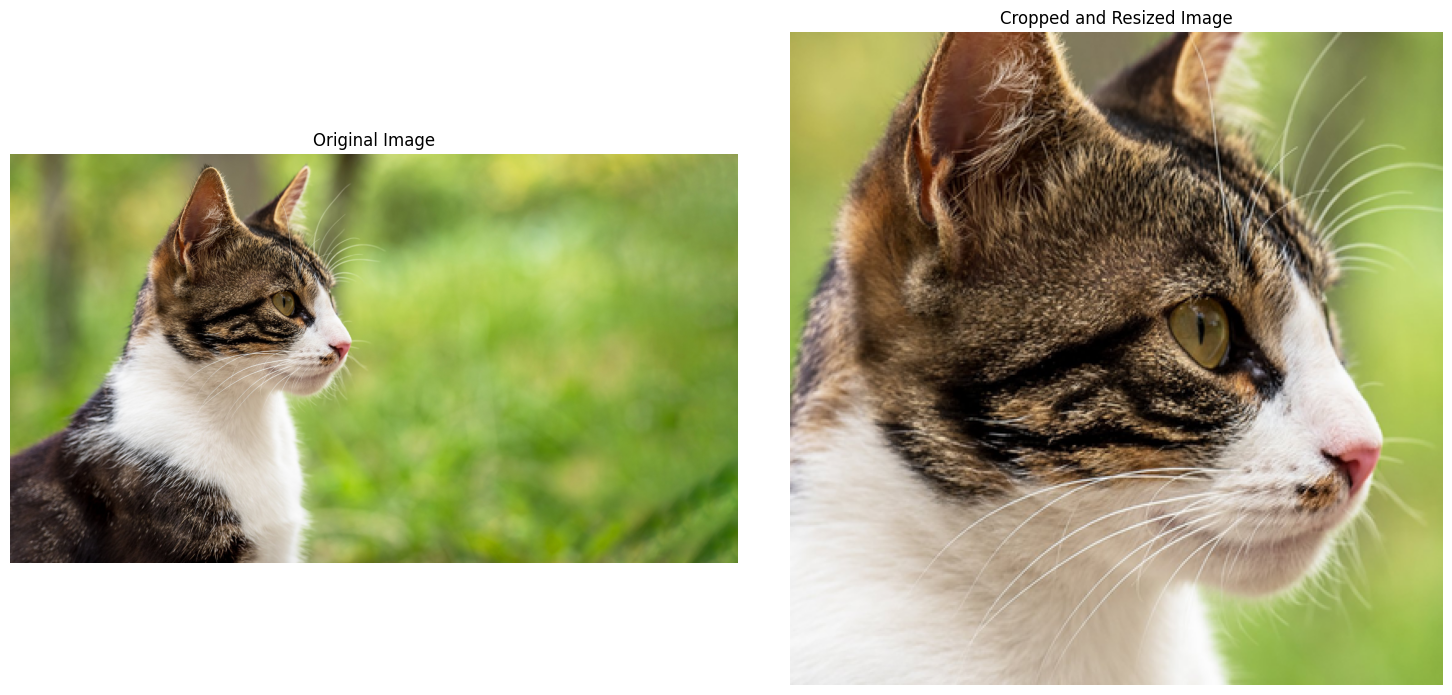

In [47]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Read image
img = Image.open('./images/cat.png')
img_array = np.array(img)
height, width = img_array.shape[:2]

# Set koordinat crop
left = width // 6
top = height // 9
right = 2 * width // 4
bottom = 4 * height // 6

# Crop image menjadi 400x400
img_cropped = img.crop((left, top, right, bottom))
img_cropped = img_cropped.resize((400, 400), Image.Resampling.LANCZOS)

# Display images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# Original image
ax1.imshow(img_array)
ax1.set_title('Original Image')
ax1.axis('off')

# Cropped image
ax2.imshow(np.array(img_cropped))
ax2.set_title('Cropped and Resized Image')
ax2.axis('off')

plt.tight_layout()
plt.show()

<h2>Image Rescaling</h2> <a name="3.4"></a>
Seperti yang telah dijelaskan, gambar terdiri dari piksel dimana masing-masing piksel memiliki value dari 0-255. Image Scaling bertujuan untuk menyesuaikan nilai masing-masing pixel menjadi value yang lebih kecil agar dapat lebih mudah diproses oleh neural network, biasanya dari skala 0 hingga 1 atau -1 hingga 1.

Original Image Shape: (373, 500, 3)
Original Image Data Type: float32
Original Image Value Range: Min=0.0, Max=255.0


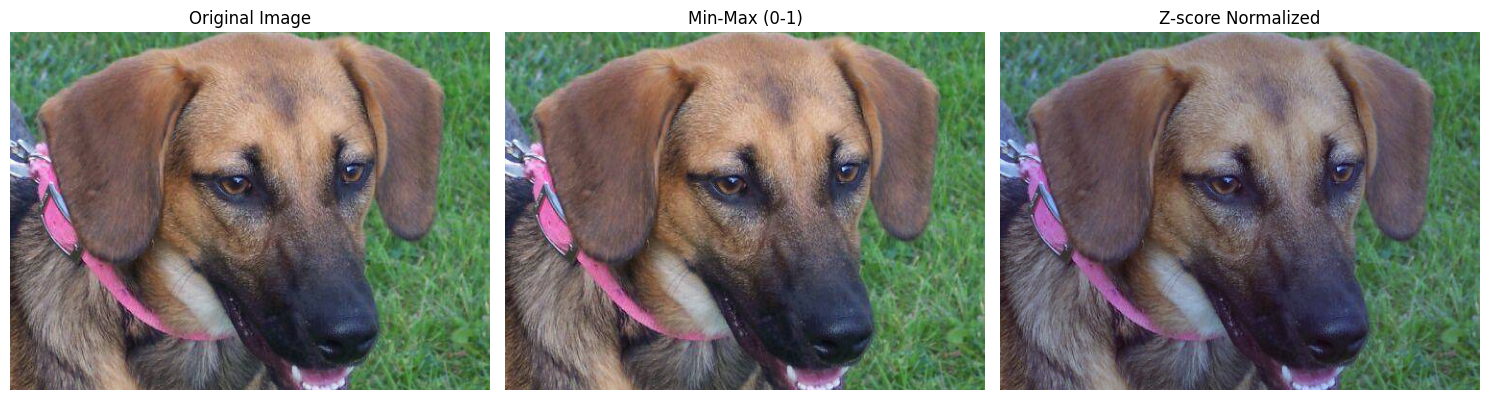


Pixel values for a 5x5 patch in the original image:
[[[ 70. 140. 116.]
  [ 82. 147. 123.]
  [ 97. 156. 134.]
  [105. 157. 134.]
  [101. 147. 121.]]

 [[ 70. 138. 115.]
  [ 79. 144. 120.]
  [ 93. 151. 127.]
  [101. 154. 128.]
  [ 99. 145. 119.]]

 [[ 71. 136. 112.]
  [ 76. 138. 113.]
  [ 86. 144. 119.]
  [ 95. 148. 120.]
  [ 96. 142. 114.]]

 [[ 76. 139. 112.]
  [ 77. 137. 111.]
  [ 82. 138. 111.]
  [ 89. 142. 112.]
  [ 91. 138. 106.]]

 [[ 86. 145. 115.]
  [ 84. 140. 111.]
  [ 84. 137. 107.]
  [ 87. 138. 107.]
  [ 84. 134.  99.]]]

Pixel values for a 5x5 patch in the Min-Max normalized image:
[[[0.27450982 0.54901963 0.45490196]
  [0.32156864 0.5764706  0.48235294]
  [0.38039216 0.6117647  0.5254902 ]
  [0.4117647  0.6156863  0.5254902 ]
  [0.39607844 0.5764706  0.4745098 ]]

 [[0.27450982 0.5411765  0.4509804 ]
  [0.30980393 0.5647059  0.47058824]
  [0.3647059  0.5921569  0.49803922]
  [0.39607844 0.6039216  0.5019608 ]
  [0.3882353  0.5686275  0.46666667]]

 [[0.2784314  0.53333336 

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def load_image_from_path(image_path):
    """Load image from local path"""
    img = Image.open(image_path)
    return img

def normalize_image(img):
    """Convert image to numpy array and perform Min-Max and Z-score normalizations"""
    # Convert ke numpy array
    img_array = np.array(img).astype(np.float32)
    
    original_shape = img_array.shape
    
    # original image details
    print(f"Original Image Shape: {original_shape}")
    print(f"Original Image Data Type: {img_array.dtype}")
    print(f"Original Image Value Range: Min={img_array.min()}, Max={img_array.max()}")
    
    # Method 1: Min-Max normalization (0-1 scaling)
    img_normalized_0_1 = img_array / 255.0
    
    # Method 2: Standardization dengan Z-score normalization
    mean = np.mean(img_array, axis=(0, 1))
    std = np.std(img_array, axis=(0, 1))
    img_standardized = (img_array - mean) / std
    
    # Visualize the normalizations
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    
    # Original
    axes[0].imshow(img_array.astype(np.uint8))
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    
    # Min-Max (0-1)
    axes[1].imshow(img_normalized_0_1)
    axes[1].set_title('Min-Max (0-1)')
    axes[1].axis('off')
    
    # Z-score
    # Rescale for visualization
    z_score_viz = (img_standardized - img_standardized.min()) / (img_standardized.max() - img_standardized.min())
    axes[2].imshow(z_score_viz)
    axes[2].set_title('Z-score Normalized')
    axes[2].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    
    # Print pixel values for a small region (e.g., top-left 5x5 patch)
    print("\nPixel values for a 5x5 patch in the original image:")
    print(img_array[:5, :5])  # Top-left 5x5 patch of the original image
    
    print("\nPixel values for a 5x5 patch in the Min-Max normalized image:")
    print(img_normalized_0_1[:5, :5])  # Top-left 5x5 patch of the Min-Max normalized image
    
    print("\nPixel values for a 5x5 patch in the Z-score normalized image:")
    print(img_standardized[:5, :5])  # Top-left 5x5 patch of the Z-score normalized image
    
    return {
        'original': img_array,
        'normalized_0_1': img_normalized_0_1,
        'standardized': img_standardized
    }

image_path = './images/dog.jpg'

# Load image
try:
    img = load_image_from_path(image_path)
    normalized_images = normalize_image(img)
    
except Exception as e:
    print(f"Error processing image: {e}")

## Filter Pada CNN <a name="3.5"></a>

## Apa Itu Filter pada CNN?
Filter, atau kernel adalah bagian penting dalam layer konvolusi pada Convolutional Neural Network (CNN). Filter ini berperan seperti kacamata khusus yang membantu CNN untuk melihat dan mengenali fitur-fitur tertentu pada gambar masukan. Filter ini bergerak melintasi gambar dan menerapkan operasi matematis untuk mengekstrak fitur seperti tepi, tekstur, dan pola.

## Fungsi Filter pada CNN
### 1. **Basic Feature Extraction**
- Deteksi Tepi: 
Menyoroti perubahan intensitas piksel, penting untuk mengenali tepi objek.
- Deteksi Sudut: 
Mengenali perubahan arah signifikan dalam intensitas piksel.
### 2. **Image Processing**
- Blurring: 
Mengurangi noise dengan mengaburkan gambar.
- Sharpening: 
Meningkatkan kontras tepi untuk memperjelas gambar.
### 3. **Hierarchical Feature Learning**
- Fitur Rendah (Low-Level): 
Seperti tepi dan sudut pada lapisan awal.
- Fitur Menengah (Mid-Level): 
Seperti bentuk dan pola pada lapisan tengah.
- Fitur Tinggi (High-Level): 
Seperti objek dan bagian wajah pada lapisan akhir.

## Cara Kerja Flter
Filter bekerja dengan sliding window, di mana filter melintasi gambar dan pada setiap posisi:

### 1. **Element-wise Multiplication**
Setiap elemen filter dikalikan dengan elemen gambar.
### 2. **Summation**
Hasil perkalian dijumlahkan untuk membentuk satu nilai dalam feature map.
### 3. **Stride**
Jarak perpindahan filter dari satu posisi ke posisi berikutnya.
### 4. **Padding**
Penambahan piksel di tepi gambar untuk mempertahankan ukuran output tertentu.

## Jenis-jenis Filter

### 1. Prewitt Filters
Prewitt filter terdiri dari dua filter untuk mendeteksi tepi vertikal dan horizontal. Filter horizontal mendeteksi tepi yang memotong sumbu horizontal, sementara filter vertikal mendeteksi tepi yang memotong sumbu vertikal.
<div align="center">
<img src="./images/prewitt_2.png" height="250" alt="prewitt">
</div>

#### Contoh
- Horizontal
<div align="left">
<img src="./images/paperspace_prewitt_x-1.png" height="250" alt="pooling">
</div>

- Vertical
<div align="left">
<img src="./images/paperspace_prewitt_y.png" height="250" alt="pooling">
</div>

### 2. Sobel Filters
Mirip dengan Prewitt, Sobel filter juga mendeteksi tepi vertikal dan horizontal, namun menghasilkan intensitas piksel tepi yang lebih tinggi, sehingga tepi yang terdeteksi lebih tajam.
<div align="center">
<img src="./images/sobel.png" height="250" alt="sobel">
</div>

#### Contoh
- Horizontal
<div align="left">
<img src="./images/paperspace_sobel_x.png" height="250" alt="sobel_x">
</div>

- Vertical
<div align="left">
<img src="./images/paperspace_sobel_y.png" height="250" alt="sobel_y">
</div>

### 3. Laplacian Filters
Laplacian filter menggunakan satu filter yang mendeteksi tepi dari berbagai orientasi. Ini menghitung turunan orde kedua dari nilai piksel.
<div align="center">
<img src="./images/laplacian.png" height="250" alt="laplacian">
</div>

#### Contoh
<div align="left">
<img src="./images/paperspace_laplacian_2.png" height="250" alt="laplacian_example">
</div>

### 4. Robinson Compass Masks
Robinson Compass mask terdiri dari delapan filter yang mendeteksi tepi dalam arah kompas geografis.
<div align="center">
<img src="./images/robinson.png" height="250" alt="robinson">
</div>

#### Contoh
- North East
<div align="left">
<img src="./images/paperspace_robinson_ne.png" height="250" alt="robinson_ne">
</div>

- North West
<div align="left">
<img src="./images/paperspace_robinson_nw.png" height="250" alt="robinson_nw">
</div>

### 5. Krisch Compass Masks
Krisch Compass mask juga terdiri dari delapan filter yang mendeteksi tepi dalam arah kompas geografis.
<div align="center">
<img src="./images/krisch.png" height="350" alt="krisch">
</div>

#### Contoh
- South East
<div align="left">
<img src="./images/paperspace_krisch_se.png" height="250" alt="krisch_se">
</div>

- South West
<div align="left">
<img src="./images/paperspace_krisch_sw.png" height="250" alt="krisch_sw">
</div>